In [38]:
import xmltodict
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import json


In [58]:
def df_to_dict(df):
    if df.ndim == 1:
        return df.to_dict()

    ret = {}
    for key in df.index.get_level_values(0):
        
        sub_df = df.xs(key)
        ret[key + 1] = df_to_dict(sub_df)
    return ret

In [60]:
path = os.path.expanduser("E:/Downloads/tree_loc.csv")

data = pd.read_csv(path,engine='python')
data.rename(columns={'ï»¿above00':'above00'}, inplace=True)
tree_loc = df_to_dict(data)


In [2]:
def process_states(obj, states):
    for state in states:
        if state['@name'] == 'completed':
            obj['completed'].append(state['@value'])
        elif state['@name'] == 'pending':
            obj['pending'].append(state['@value'])
        elif state['@name'] == 'active':
            obj['active'].append(state['@value'])

In [3]:
def process_steps(obj, steps):
    obj['max_steps'].append(steps['Max']['@value'])
    obj['min_steps'].append(steps['Min']['@value'])
    obj['avg_steps'].append(steps['Average']['@value'])

In [4]:
def get_file_name(num):
    if(num > 9):
        return 'forest-0' + str(num)
    else:
        return 'forest-00' + str(num)

In [211]:
def create_dataset(starting_path,stochastic_num, xml_ending, algo):
    summary = {
        'forest_name': [],
        'goal_name': [],
        'stochasticity':[],
        'algo':[],
        'completed':[],
        'pending':[],
        'active':[],
#         'max_steps':[],
#         'min_steps':[],
#         'avg_steps':[]
    }
    
    for i in range(1, 31):
        
        file_name = get_file_name(i)
        
        try:
#             print(starting_path +  "/forests/" + file_name + \
#                                       "/perfMeasures-config-"+ algo +"-" + file_name +".xml.xml-"+ xml_ending + ".xml")
# #             E:\Downloads\experiment-trees-00-results\00-above3\forests
# 'E:/Downloads/manual-trees/forests-fifo-new/new2Roots1-2Goals-
            
            path = os.path.expanduser(starting_path + "/forests/" + file_name + \
                                      "/perfMeasures-config-"+ algo +"-" + file_name +".xml.xml-"+ xml_ending + ".xml")
            with open(path) as fd:
                tree = xmltodict.parse(fd.read())
        except:
            continue
        goals = tree['PerformanceReport']['GoalMeasures']['Goal']
        
        if(not isinstance(goals, list)):
            states = goals['State']
#             steps = goals['Steps']


            process_states(summary, states)
#             process_steps(summary, steps)

            summary['forest_name'].append(file_name)
            summary['goal_name'].append(goals['@name'])
            summary['stochasticity'].append(stochastic_num)
            summary['algo'].append(algo)
        else:
            for goal in goals:
                states = goal['State']
                steps = goal['Steps']

                process_states(summary, states)
#                 process_steps(summary, steps)

                summary['forest_name'].append(file_name)
                summary['goal_name'].append(goal['@name'])
                summary['stochasticity'].append(stochastic_num)
                summary['algo'].append(algo)
        
    df = pd.DataFrame(summary, columns=summary.keys())

    return df


In [6]:
def plot_status(df, title):
    df = df[['completed', 'pending', 'active']]
    ax = df.astype(float).mean().plot(kind='bar', title=title)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    

In [7]:
def get_failed_by_retries(row):
    calculated_attempt = int(row['completed']) + int(row['pending']) + int(row['active'])
    return 200 - calculated_attempt
  


In [170]:
def apply_column(df):
    df['failed_by_retries'] = df.apply (lambda row: get_failed_by_retries(row), axis=1)
    

In [171]:
def get_proportion_df(df):
    df_new = df.copy()
    df_new['completed'] = df['completed'].div(200)
    df_new['pending'] = df['pending'].div(200)
    df_new['active'] = df['active'].div(200)
    df_new['failed_by_retries'] = df['failed_by_retries'].div(200)
    
    return df_new

In [202]:
df00above_00_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3', '0', '00', 'fifo')
df00above_01_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','1', '1', 'fifo')
df00above_05_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','05', '05', 'fifo')

df00bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3', '0', '00', 'fifo')
df00bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','1', '1', 'fifo')
df00bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','05', '05', 'fifo')

df00above_00_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3', '0', '00', 'rr')
df00above_01_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','1', '1', 'rr')
df00above_05_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','05', '05', 'rr')

df00bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3', '0', '00', 'rr')
df00bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','1', '1', 'rr')
df00bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','05', '05', 'rr')

# df00above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/00-above3', '0', '00', 'rr')
# df00above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/00-above3','1', '1', 'rr')
# df00above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/00-above3','05', '05', 'rr')

# df00bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/00-bellow3', '0', '00', 'rr')
# df00bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/00-bellow3','1', '1', 'rr')
# df00bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/00-bellow3','05', '05', 'rr')

#####################################

df04above_00_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3', '0', '00', 'fifo')
df04above_01_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','1', '1', 'fifo')
df04above_05_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','05', '05', 'fifo')

df04bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3', '0', '00', 'fifo')
df04bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','1', '1', 'fifo')
df04bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','05', '05', 'fifo')

df04above_00_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3', '0', '00', 'rr')
df04above_01_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','1', '1', 'rr')
df04above_05_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','05', '05', 'rr')


#E:\Downloads\experiment-trees-04-results\04-bellow3
df04bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3', '0', '00', 'rr')
df04bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','1', '1', 'rr')
df04bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','05', '05', 'rr')

df04above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3', '0', '00', 'custom')
df04above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','1', '1', 'custom')
df04above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/00-above3','05', '05', 'custom')

df04bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3', '0', '00', 'custom')
df04bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3','1', '1', 'custom')
df04bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3','05', '05', 'custom')

######################################

df75above_00_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3', '0', '00', 'fifo')
df75above_01_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','1', '1', 'fifo')
df75above_05_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','05', '05', 'fifo')

df75bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3', '0', '00', 'fifo')
df75bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','1', '1', 'fifo')
df75bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','05', '05', 'fifo')

df75above_00_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3', '0', '00', 'rr')
df75above_01_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','1', '1', 'rr')
df75above_05_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','05', '05', 'rr')

df75bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3', '0', '00', 'rr')
df75bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','1', '1', 'rr')
df75bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','05', '05', 'rr')


#######################################################################




In [212]:
df04above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','1', '1', 'custom')
df04above_01_cus

forest_name goal_name stochasticity    algo completed pending active
0   forest-001     T0-G0             1  custom       182       0     18
1   forest-001     T1-G0             1  custom       200       0      0
2   forest-002     T0-G0             1  custom       200       0      0
3   forest-002     T1-G0             1  custom       170       0     14
4   forest-003     T0-G0             1  custom       105       0     95
5   forest-003     T1-G0             1  custom       200       0      0
6   forest-004     T0-G0             1  custom       200       0      0
7   forest-004     T1-G0             1  custom       200       0      0
8   forest-005     T0-G0             1  custom       200       0      0
9   forest-005     T1-G0             1  custom       187       0     13
10  forest-006     T0-G0             1  custom       150       0     19
11  forest-006     T1-G0             1  custom       200       0      0
12  forest-007     T0-G0             1  custom       200       0      0
13  forest-007     T1-G0             1  custom       200       0      0
14  forest-008     T0-G0             1  custom       169       0      7
15  forest-008     T1-G0             1  custom       200       0      0
16  forest-009     T0-G0             1  custom        89       0     90
17  forest-009     T1-G0             1  custom       200       0      0
18  forest-010     T0-G0             1  custom       148       0     25
19  forest-010     T1-G0             1  custom       139       0     22
20  forest-011     T0-G0             1  custom       172       0     28
21  forest-011     T1-G0             1  custom       200       0      0
22  forest-012     T0-G0             1  custom       157       0     43
23  forest-012     T1-G0             1  custom       200       0      0
24  forest-013     T0-G0             1  custom       200       0      0
25  forest-013     T1-G0             1  custom       200       0      0
26  forest-014     T0-G0             1  custom       200       0      0
27  forest-014     T1-G0             1  custom       200       0      0
28  forest-015     T0-G0             1  custom       197       0      3
29  forest-015     T1-G0             1  custom       142       0     38
30  forest-016     T0-G0             1  custom       200       0      0
31  forest-016     T1-G0             1  custom       112       0     66
32  forest-017     T0-G0             1  custom       200       0      0
33  forest-017     T1-G0             1  custom       200       0      0
34  forest-018     T0-G0             1  custom       100       0     75
35  forest-018     T1-G0             1  custom       200       0      0
36  forest-019     T0-G0             1  custom       148       0     13
37  forest-019     T1-G0             1  custom       134       0     26
38  forest-020     T0-G0             1  custom       200       0      0
39  forest-020     T1-G0             1  custom       151       0     49
40  forest-021     T0-G0             1  custom       200       0      0
41  forest-021     T1-G0             1  custom       125       0     53
42  forest-022     T0-G0             1  custom       120       0     51
43  forest-022     T1-G0             1  custom       155       0     45
44  forest-023     T0-G0             1  custom       130       0     47
45  forest-023     T1-G0             1  custom       200       0      0
46  forest-024     T0-G0             1  custom       200       0      0
47  forest-024     T1-G0             1  custom       200       0      0
48  forest-026     T0-G0             1  custom       193       0      7
49  forest-026     T1-G0             1  custom        74       0    101
50  forest-027     T0-G0             1  custom       200       0      0
51  forest-027     T1-G0             1  custom       175       0     25
52  forest-028     T0-G0             1  custom       192       0      8
53  forest-028     T1-G0             1  custom       146       0     28
54  forest-029     T0-G0             1  cus

In [173]:
df00above_00_ff = df00above_00_ff.astype({"completed": int, "pending": int, 'active': int})
df00above_05_ff = df00above_05_ff.astype({"completed": int, "pending": int, 'active': int})
df00above_01_ff = df00above_01_ff.astype({"completed": int, "pending": int, 'active': int})

df00bellow_00_ff = df00bellow_00_ff.astype({"completed": int, "pending": int, 'active': int})
df00bellow_05_ff = df00bellow_05_ff.astype({"completed": int, "pending": int, 'active': int})
df00bellow_01_ff = df00bellow_01_ff.astype({"completed": int, "pending": int, 'active': int})

df00above_00_rr = df00above_00_rr.astype({"completed": int, "pending": int, 'active': int})
df00above_05_rr = df00above_05_rr.astype({"completed": int, "pending": int, 'active': int})
df00above_01_rr = df00above_01_rr.astype({"completed": int, "pending": int, 'active': int})

df00bellow_00_rr = df00bellow_00_rr.astype({"completed": int, "pending": int, 'active': int})
df00bellow_05_rr= df00bellow_05_rr.astype({"completed": int, "pending": int, 'active': int})
df00bellow_01_rr = df00bellow_01_rr.astype({"completed": int, "pending": int, 'active': int})

###################################


df04above_00_ff = df04above_00_ff.astype({"completed": int, "pending": int, 'active': int})
df04above_05_ff = df04above_05_ff.astype({"completed": int, "pending": int, 'active': int})
df04above_01_ff = df04above_01_ff.astype({"completed": int, "pending": int, 'active': int})

df04bellow_00_ff = df04bellow_00_ff.astype({"completed": int, "pending": int, 'active': int})
df04bellow_05_ff = df04bellow_05_ff.astype({"completed": int, "pending": int, 'active': int})
df04bellow_01_ff = df04bellow_01_ff.astype({"completed": int, "pending": int, 'active': int})

df04above_00_rr = df04above_00_rr.astype({"completed": int, "pending": int, 'active': int})
df04above_05_rr = df04above_05_rr.astype({"completed": int, "pending": int, 'active': int})
df04above_01_rr = df04above_01_rr.astype({"completed": int, "pending": int, 'active': int})

df04bellow_00_rr = df04bellow_00_rr.astype({"completed": int, "pending": int, 'active': int})
df04bellow_05_rr= df04bellow_05_rr.astype({"completed": int, "pending": int, 'active': int})
df04bellow_01_rr = df04bellow_01_rr.astype({"completed": int, "pending": int, 'active': int})

##############################

df75above_00_ff = df75above_00_ff.astype({"completed": int, "pending": int, 'active': int})
df75above_05_ff = df75above_05_ff.astype({"completed": int, "pending": int, 'active': int})
df75above_01_ff = df75above_01_ff.astype({"completed": int, "pending": int, 'active': int})

df75bellow_00_ff = df75bellow_00_ff.astype({"completed": int, "pending": int, 'active': int})
df75bellow_05_ff = df75bellow_05_ff.astype({"completed": int, "pending": int, 'active': int})
df75bellow_01_ff = df75bellow_01_ff.astype({"completed": int, "pending": int, 'active': int})

df75above_00_rr = df75above_00_rr.astype({"completed": int, "pending": int, 'active': int})
df75above_05_rr = df75above_05_rr.astype({"completed": int, "pending": int, 'active': int})
df75above_01_rr = df75above_01_rr.astype({"completed": int, "pending": int, 'active': int})

df75bellow_00_rr = df75bellow_00_rr.astype({"completed": int, "pending": int, 'active': int})
df75bellow_05_rr= df75bellow_05_rr.astype({"completed": int, "pending": int, 'active': int})
df75bellow_01_rr = df75bellow_01_rr.astype({"completed": int, "pending": int, 'active': int})



In [174]:
apply_column(df00above_00_ff)
apply_column(df00above_01_ff)
apply_column(df00above_05_ff)

apply_column(df00bellow_00_ff)
apply_column(df00bellow_01_ff)
apply_column(df00bellow_05_ff)

apply_column(df00above_00_rr)
apply_column(df00above_01_rr)
apply_column(df00above_05_rr)

apply_column(df00bellow_00_rr)
apply_column(df00bellow_01_rr)
apply_column(df00bellow_05_rr)

df00above_all = pd.concat([df00above_00_ff, df00above_05_ff, df00above_01_ff, \
                      df00above_00_rr, df00above_05_rr, df00above_01_rr], ignore_index=True)

df00above_ff = pd.concat([df00above_00_ff, df00above_05_ff, df00above_01_ff], ignore_index=True)

df00above_rr = pd.concat([df00above_00_rr, df00above_05_rr, df00above_01_rr], ignore_index=True)


df00bellow_all = pd.concat([df00bellow_00_ff, df00bellow_05_ff, df00bellow_01_ff,
                     df00bellow_00_rr, df00bellow_05_rr, df00bellow_01_rr], ignore_index=True)


df00bellow_ff = pd.concat([df00bellow_00_ff, df00bellow_05_ff, df00bellow_01_ff], ignore_index=True)

df00bellow_rr = pd.concat([df00bellow_00_rr, df00bellow_05_rr, df00bellow_01_rr], ignore_index=True)


df00_all = pd.concat([df00above_all, df00bellow_all], ignore_index=True)

df00_ff = pd.concat([df00above_ff, df00bellow_ff], ignore_index=True)

df00_rr = pd.concat([df00above_rr, df00bellow_rr], ignore_index=True)

##########################

apply_column(df04above_00_ff)
apply_column(df04above_01_ff)
apply_column(df04above_05_ff)

apply_column(df04bellow_00_ff)
apply_column(df04bellow_01_ff)
apply_column(df04bellow_05_ff)

apply_column(df04above_00_rr)
apply_column(df04above_01_rr)
apply_column(df04above_05_rr)

apply_column(df04bellow_00_rr)
apply_column(df04bellow_01_rr)
apply_column(df04bellow_05_rr)

df04above_all = pd.concat([df04above_00_ff, df04above_05_ff, df04above_01_ff, \
                      df04above_00_rr, df04above_05_rr, df04above_01_rr], ignore_index=True)

df04above_ff = pd.concat([df04above_00_ff, df04above_05_ff, df04above_01_ff], ignore_index=True)

df04above_rr = pd.concat([df04above_00_rr, df04above_05_rr, df04above_01_rr], ignore_index=True)


df04bellow_all = pd.concat([df04bellow_00_ff, df04bellow_05_ff, df04bellow_01_ff,
                     df04bellow_00_rr, df04bellow_05_rr, df04bellow_01_rr], ignore_index=True)

df04bellow_ff = pd.concat([df04bellow_00_ff, df04bellow_05_ff, df04bellow_01_ff], ignore_index=True)

df04bellow_rr = pd.concat([df04bellow_00_rr, df04bellow_05_rr, df04bellow_01_rr], ignore_index=True)

df04_all = pd.concat([df04above_all, df04bellow_all], ignore_index=True)

df04_ff = pd.concat([df04above_ff, df04bellow_ff], ignore_index=True)
df04_rr = pd.concat([df04above_rr, df04bellow_rr], ignore_index=True)


##################################


apply_column(df75above_00_ff)
apply_column(df75above_01_ff)
apply_column(df75above_05_ff)

apply_column(df75bellow_00_ff)
apply_column(df75bellow_01_ff)
apply_column(df75bellow_05_ff)

apply_column(df75above_00_rr)
apply_column(df75above_01_rr)
apply_column(df75above_05_rr)

apply_column(df75bellow_00_rr)
apply_column(df75bellow_01_rr)
apply_column(df75bellow_05_rr)

df75above_all = pd.concat([df75above_00_ff, df75above_05_ff, df75above_01_ff, \
                      df75above_00_rr, df75above_05_rr, df75above_01_rr], ignore_index=True)

df75above_ff = pd.concat([df75above_00_ff, df75above_05_ff, df75above_01_ff], ignore_index=True)

df75above_rr = pd.concat([df75above_00_rr, df75above_05_rr, df75above_01_rr], ignore_index=True)


df75bellow_all = pd.concat([df75bellow_00_ff, df75bellow_05_ff, df75bellow_01_ff,
                     df75bellow_00_rr, df75bellow_05_rr, df75bellow_01_rr], ignore_index=True)

df75bellow_ff = pd.concat([df75bellow_00_ff, df75bellow_05_ff, df75bellow_01_ff], ignore_index=True)

df75bellow_rr = pd.concat([df75bellow_00_rr, df75bellow_05_rr, df75bellow_01_rr], ignore_index=True)

df75_all = pd.concat([df75above_all, df75bellow_all], ignore_index=True)

df75_ff = pd.concat([df75above_ff, df75bellow_ff], ignore_index=True)
df75_rr = pd.concat([df75above_rr, df75bellow_rr], ignore_index=True)



In [175]:

df75bellow_ff .groupby(['stochasticity', 'goal_name']).sum()

completed  pending  active  failed_by_retries
stochasticity goal_name                                               
0             T0-G0           4543        0     958                299
              T1-G0           4535        0    1070                195
05            T0-G0           4837        0     696                267
              T1-G0           4996        0     632                172
1             T0-G0           4952        0     550                298
              T1-G0           5054        0     540                206

In [178]:
def plot_all(df_list, titles, title):
    nrow=2
    ncol=3
    fig, axes = plt.subplots(nrow, ncol)
    fig.suptitle(title, fontsize=16)


    count=0
    for r in range(nrow):
        for c in range(ncol):
            
            
            df = df_list[count][['completed', 'pending', 'active', 'failed_by_retries']]
            
            df_new = get_proportion_df(df)
            
            
            ax = df_new.astype(float).plot(ax=axes[r,c], kind='box', title=titles[count] , figsize=(12,8))
            for p in ax.patches:
                ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

            plt.sca(axes[r,c])
            plt.xticks(np.arange(1, 5), ("C", "P", "A", "R"))

            count = count + 1
    
#     plt.title(title, x= -0.7, y = 2.4)
    plt.show()

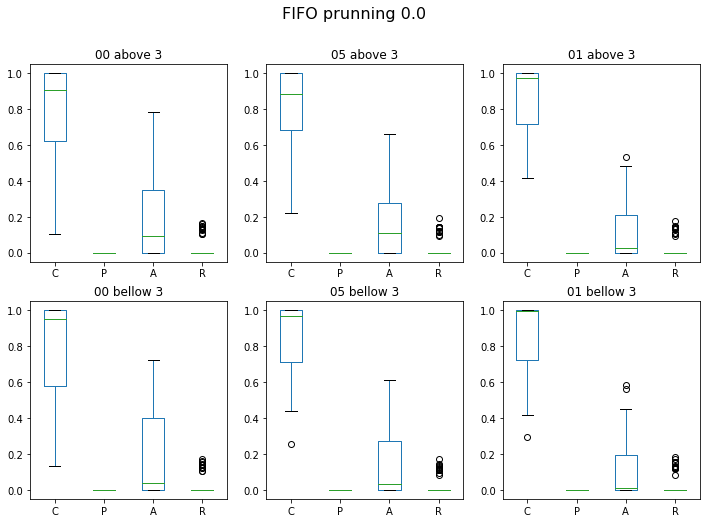

In [179]:
plot_all([df00above_00_ff ,df00above_05_ff, df00above_01_ff,df00bellow_00_ff ,df00bellow_05_ff, df00bellow_01_ff], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "FIFO prunning 0.0")

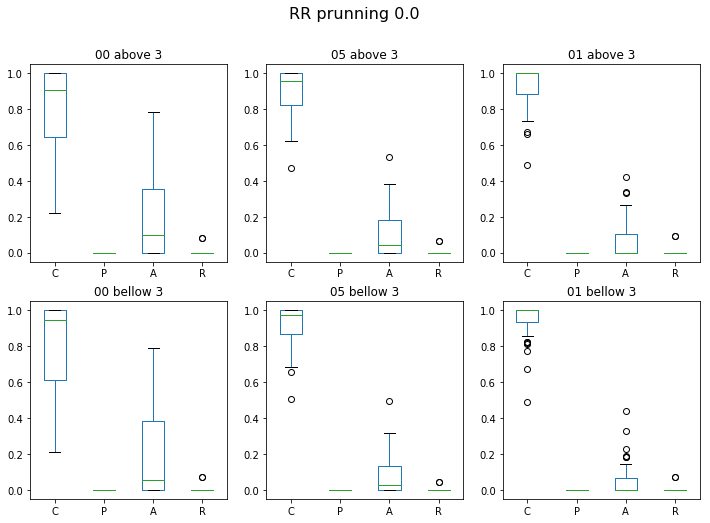

In [180]:
plot_all([df00above_00_rr ,df00above_05_rr, df00above_01_rr,df00bellow_00_rr ,df00bellow_05_rr, df00bellow_01_rr], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "RR prunning 0.0")

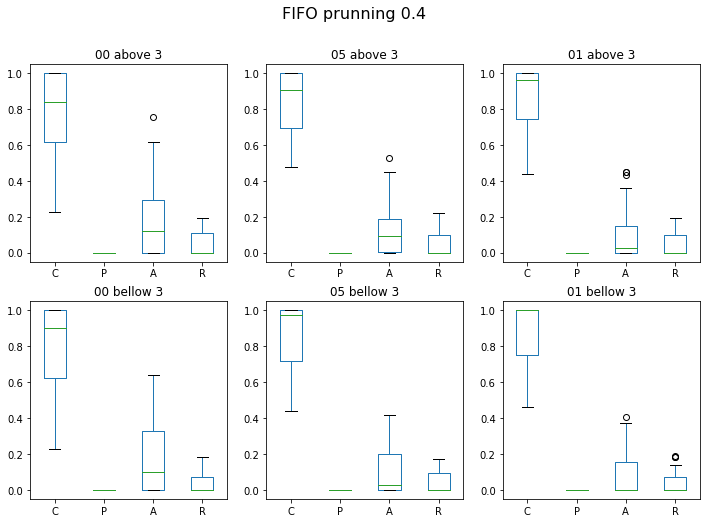

In [181]:
plot_all([df04above_00_ff ,df04above_05_ff, df04above_01_ff,df04bellow_00_ff ,df04bellow_05_ff, df04bellow_01_ff], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "FIFO prunning 0.4")

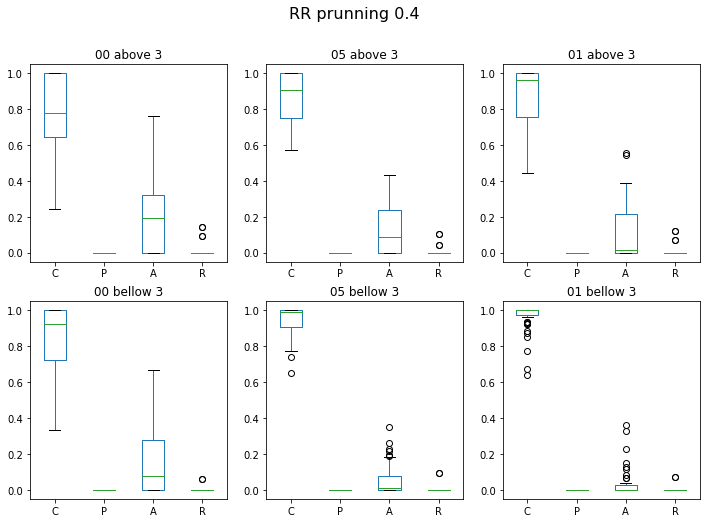

In [182]:
plot_all([df04above_00_rr ,df04above_05_rr, df04above_01_rr,df04bellow_00_rr ,df04bellow_05_rr, df04bellow_01_rr], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "RR prunning 0.4")

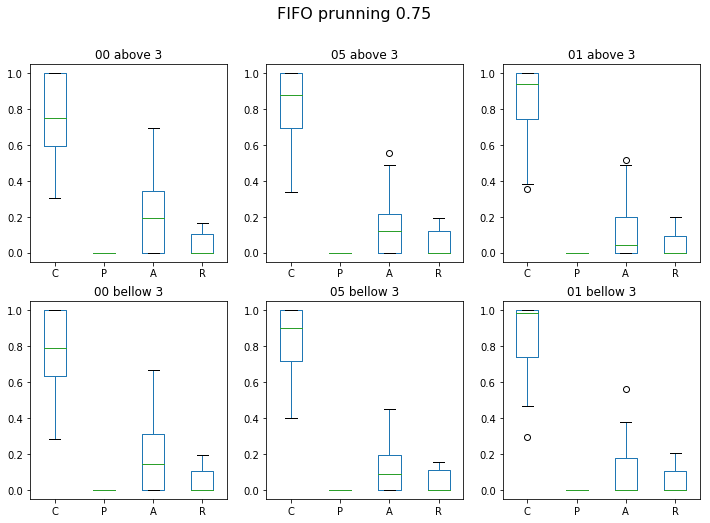

In [183]:
plot_all([df75above_00_ff ,df75above_05_ff, df75above_01_ff,df75bellow_00_ff ,df75bellow_05_ff, df75bellow_01_ff], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "FIFO prunning 0.75")

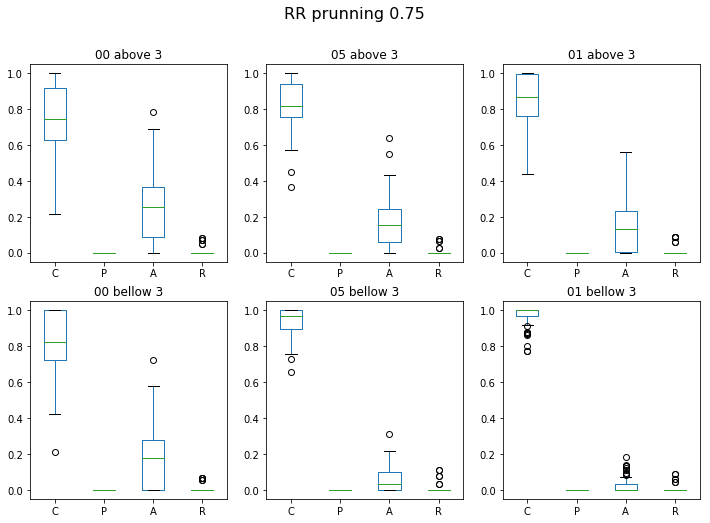

In [184]:
plot_all([df75above_00_rr ,df75above_05_rr, df75above_01_rr,df75bellow_00_rr ,df75bellow_05_rr, df75bellow_01_rr], \
             ['00 above 3', '05 above 3','01 above 3','00 bellow 3', '05 bellow 3','01 bellow 3'], "RR prunning 0.75")

In [185]:
def plot_many(df0, df1, title0, title1, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            
                        
            df0_new = get_proportion_df(df0_copy)
            df1_new = get_proportion_df(df1_copy)

            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))

            df0_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[0])

            axs[0].set_title(title0)
            fig.suptitle((file_name + " " + category), fontsize=14)
            df1_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[1])

            axs[1].set_title(title1)


            plt.show()
        except:
            print(file_name + " not found")

        

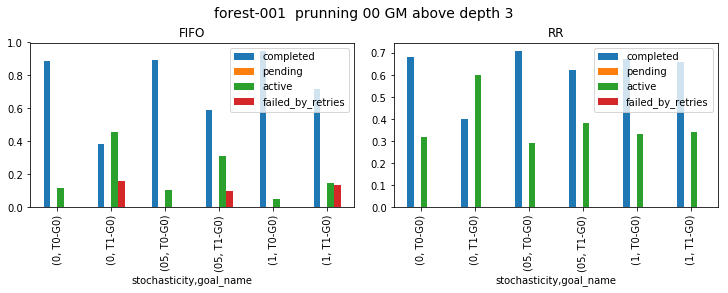

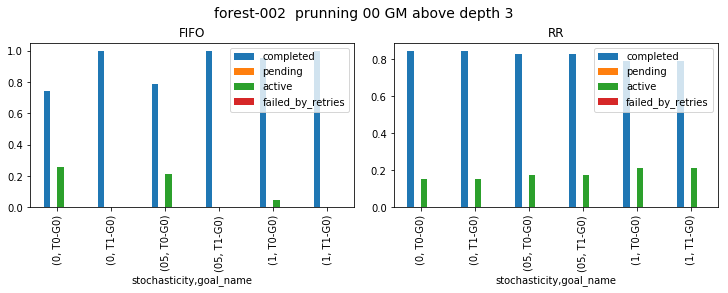

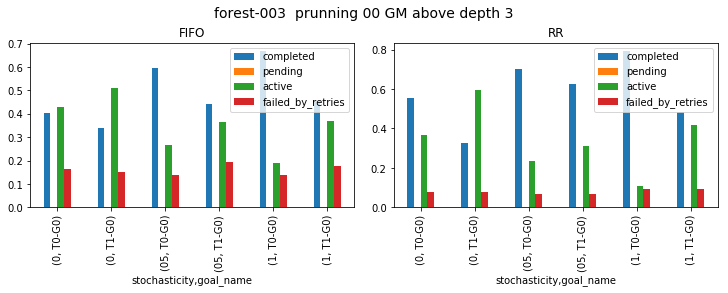

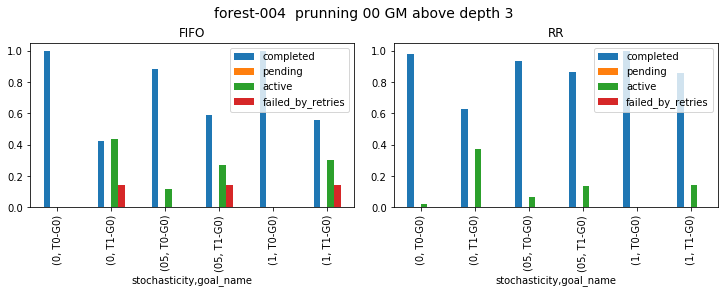

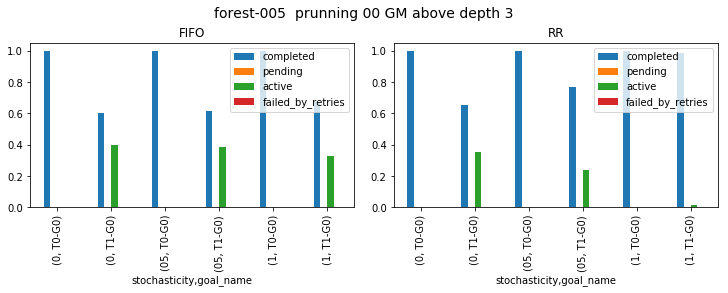

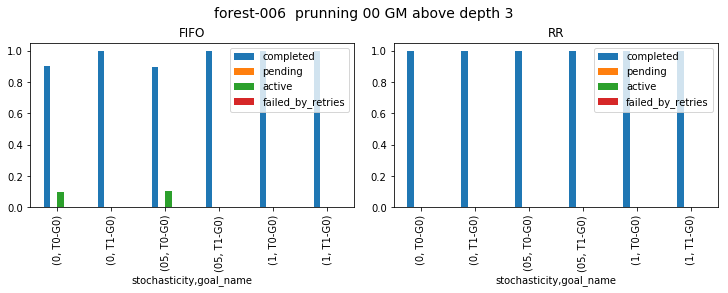

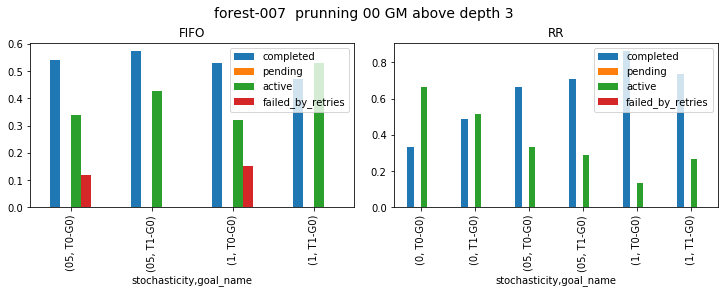

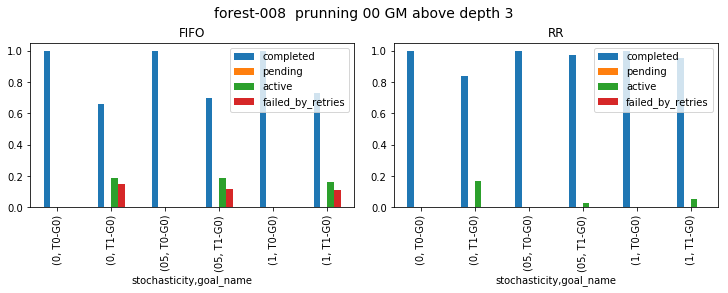

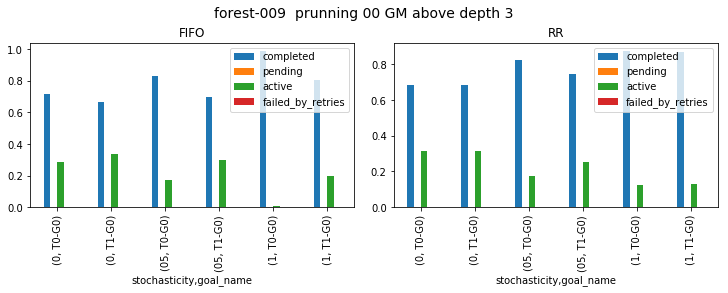

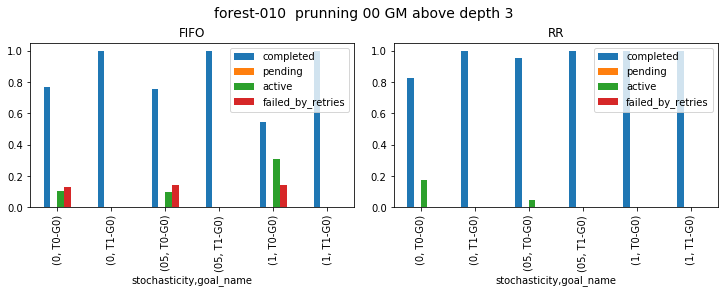

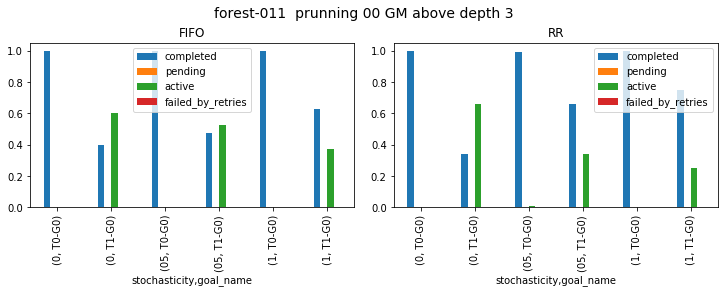

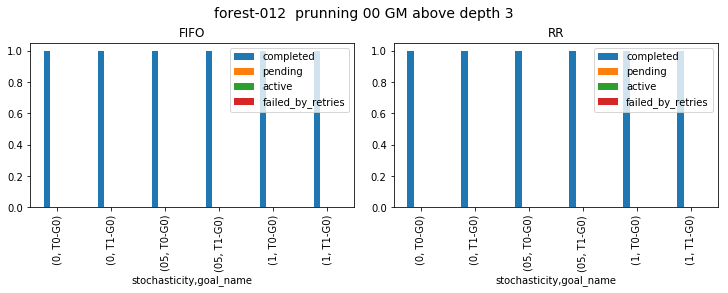

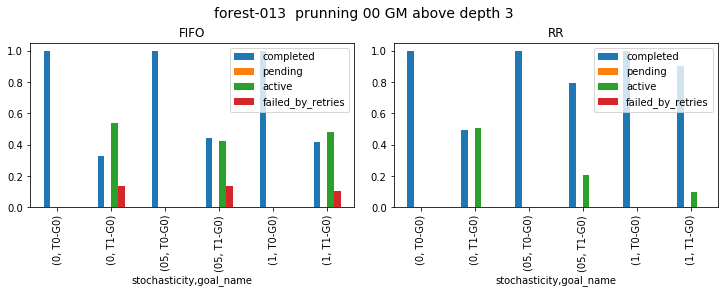

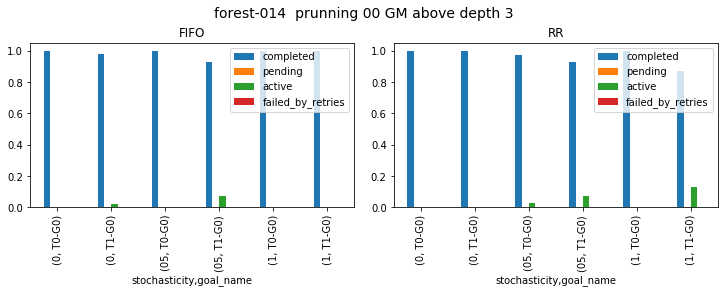

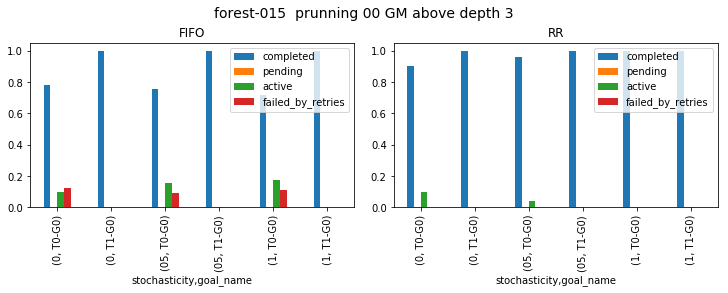

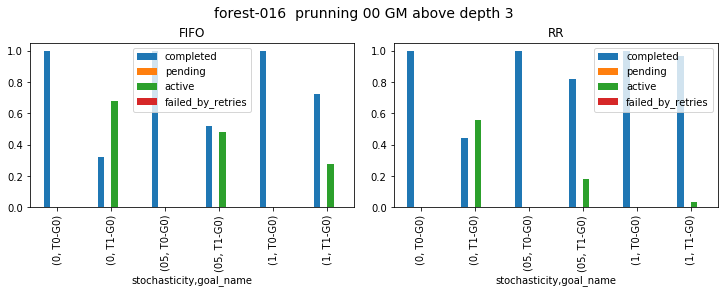

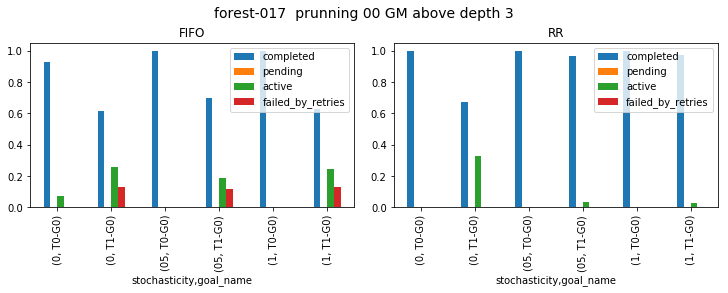

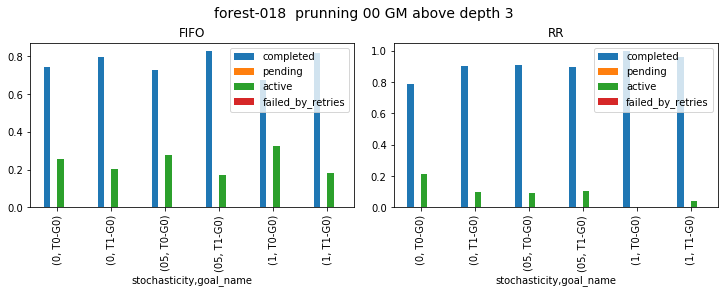

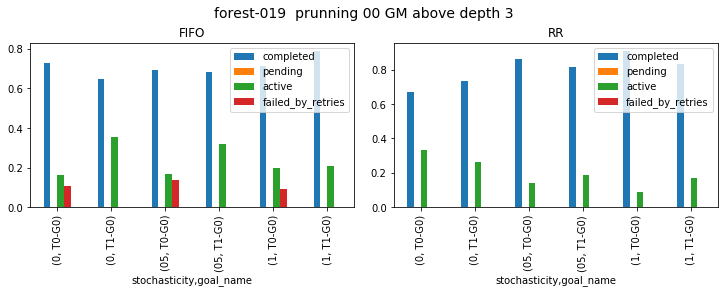

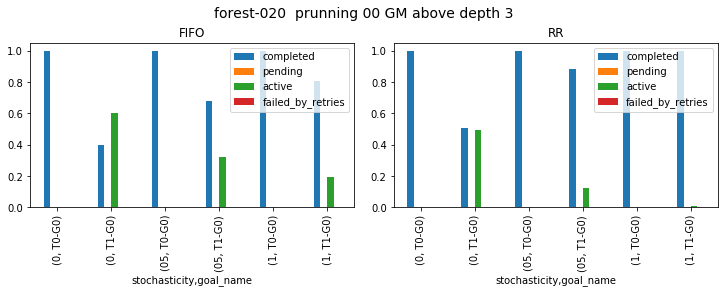

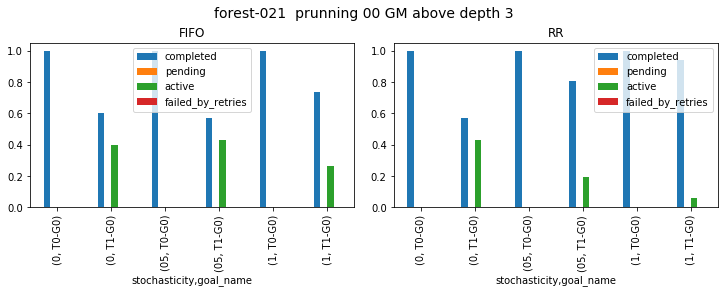

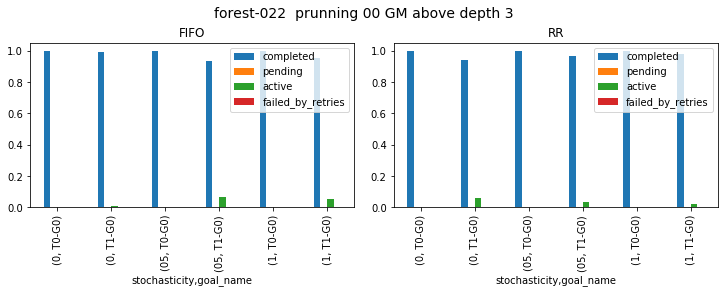

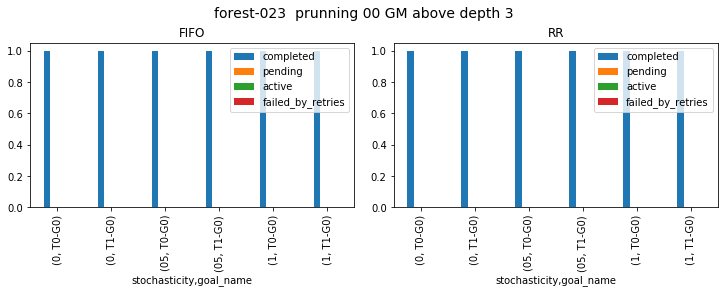

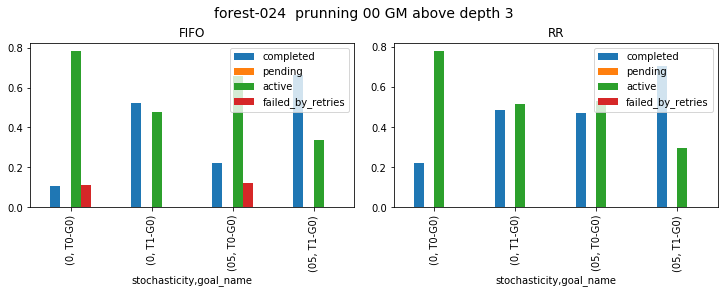

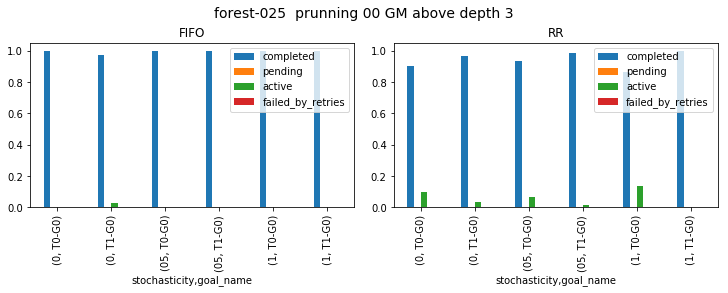

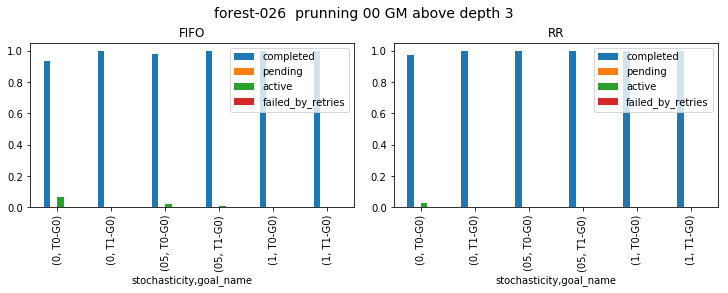

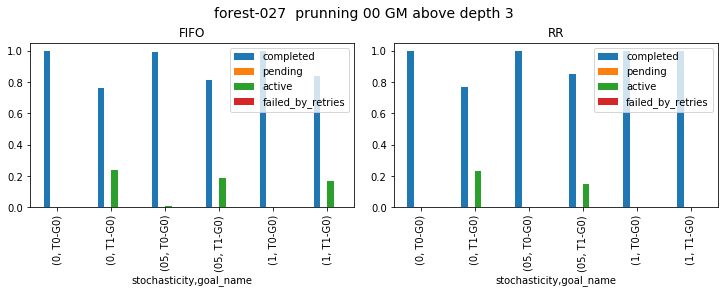

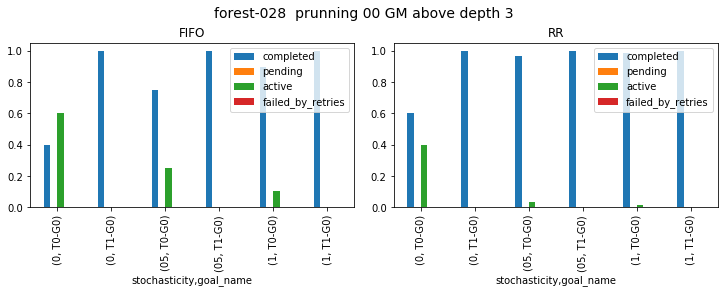

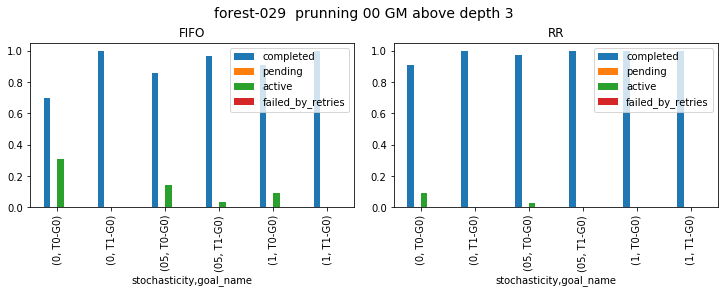

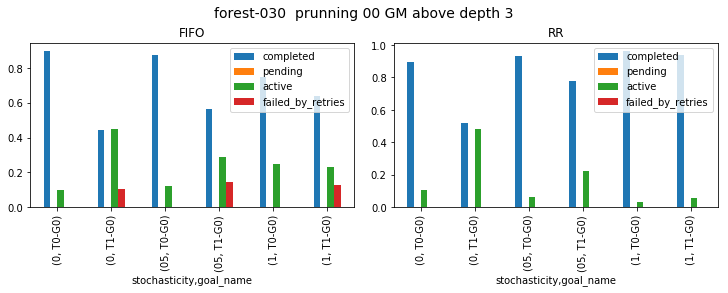

In [186]:
plot_many(df00above_ff, df00above_rr, "FIFO", "RR", " prunning 00 GM above depth 3")

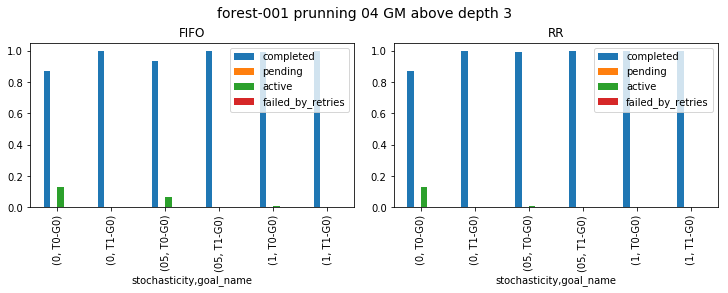

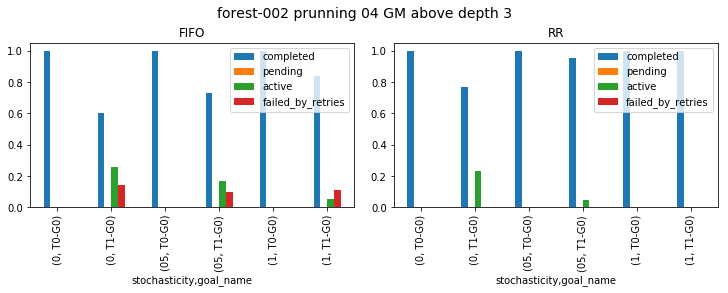

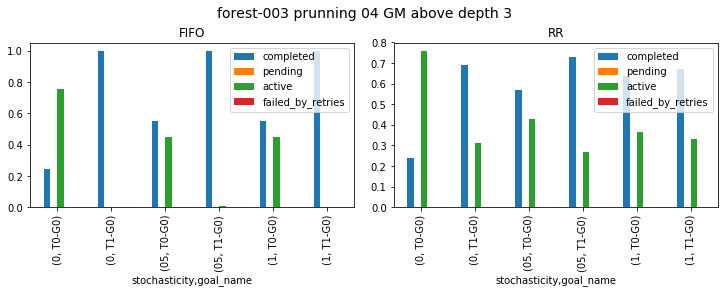

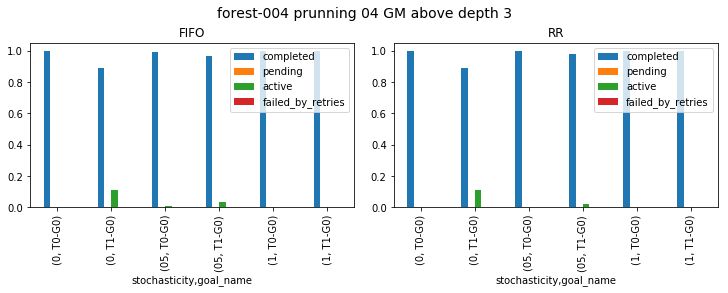

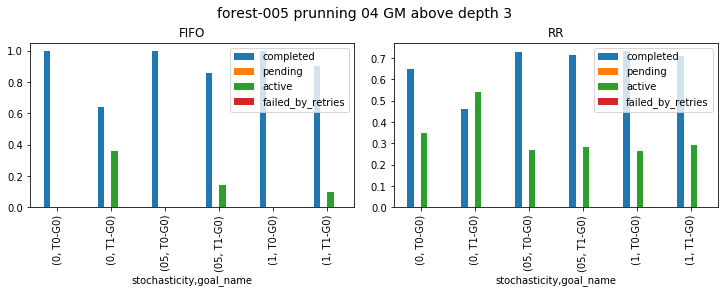

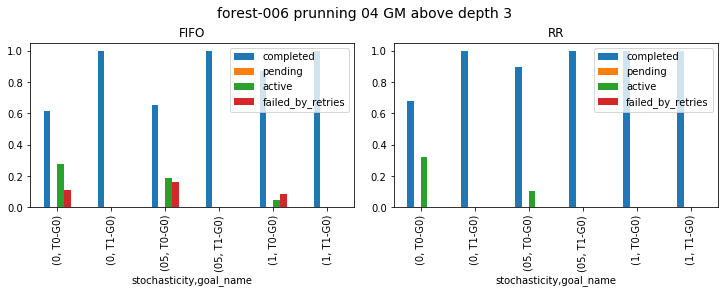

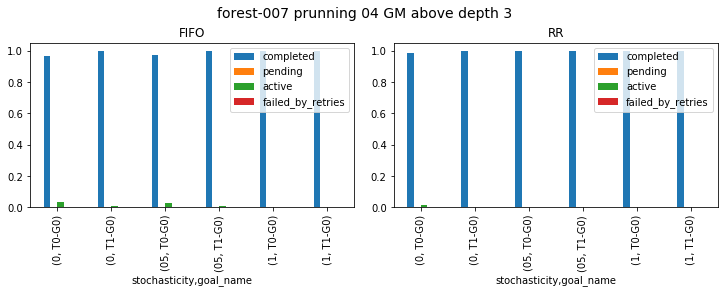

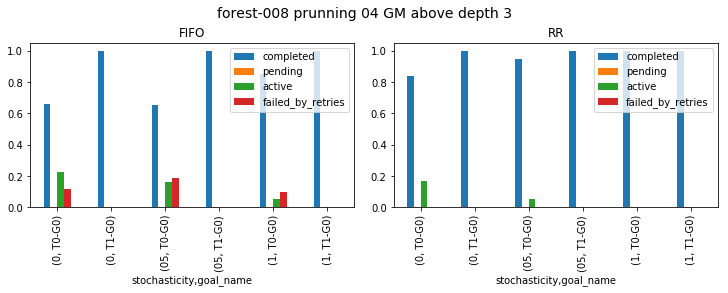

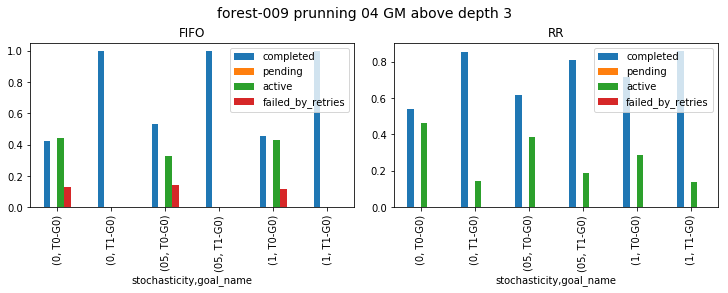

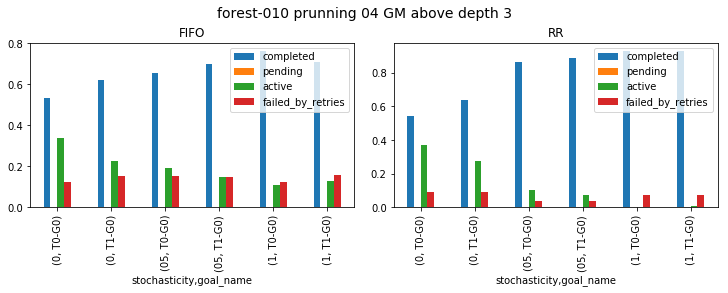

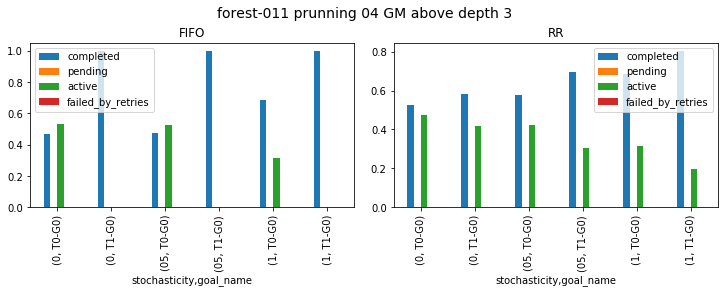

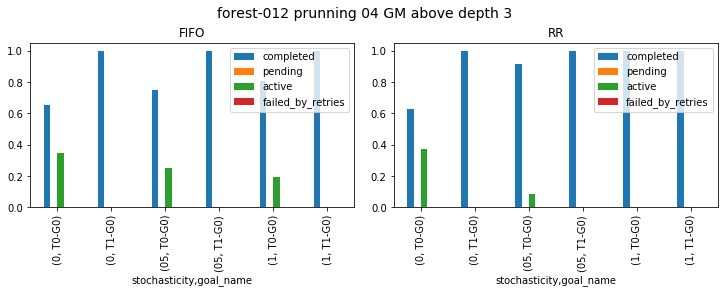

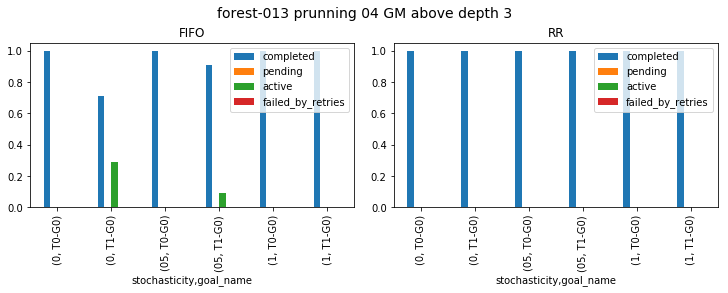

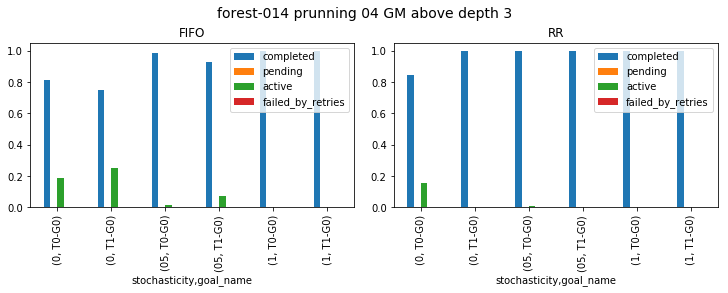

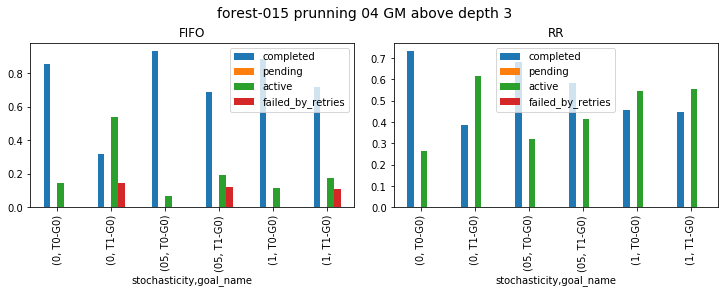

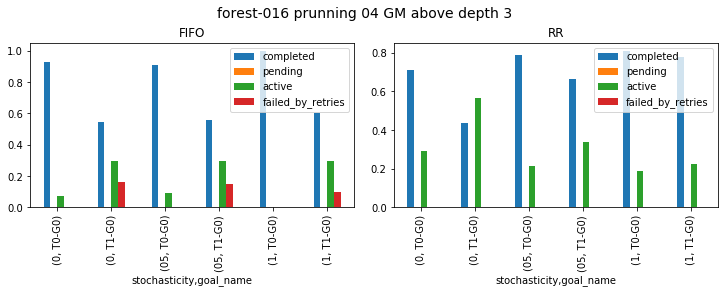

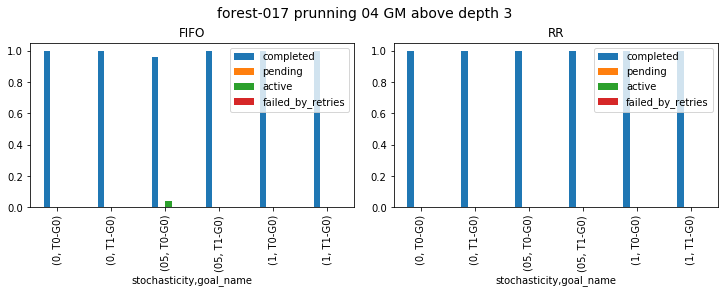

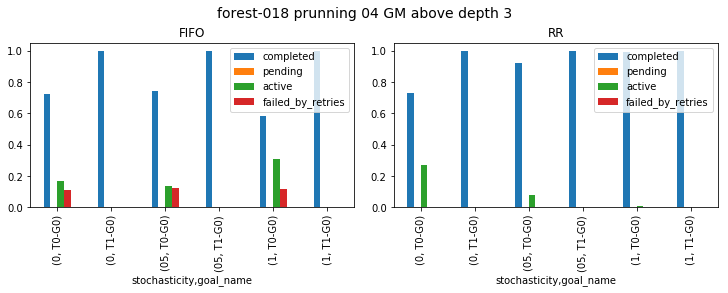

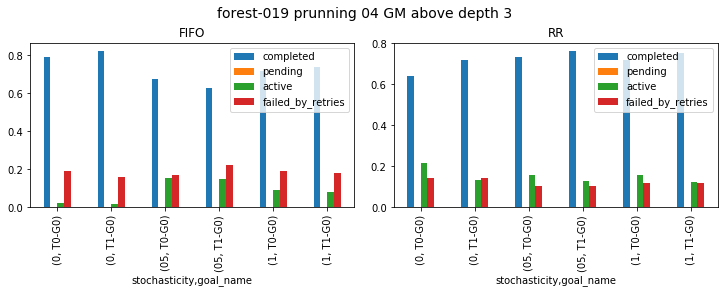

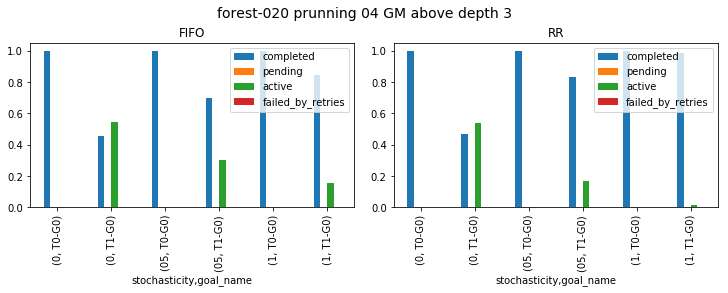

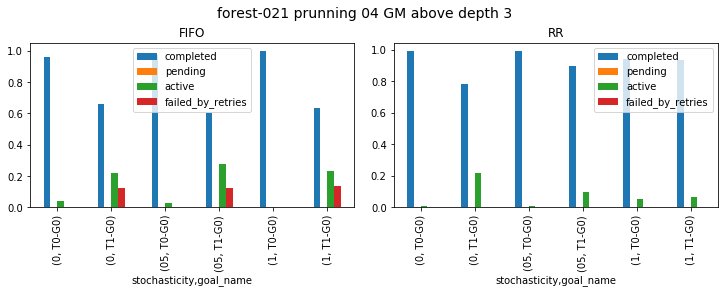

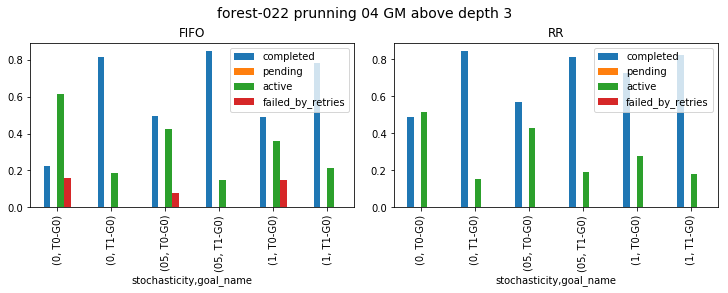

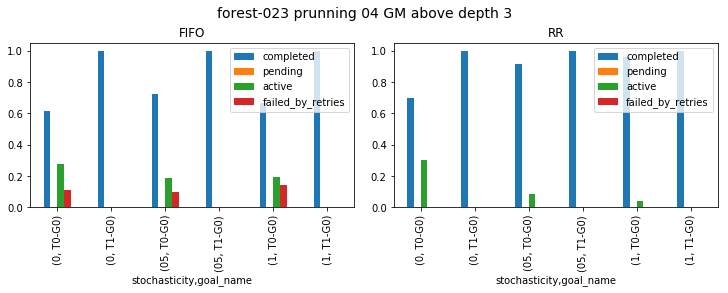

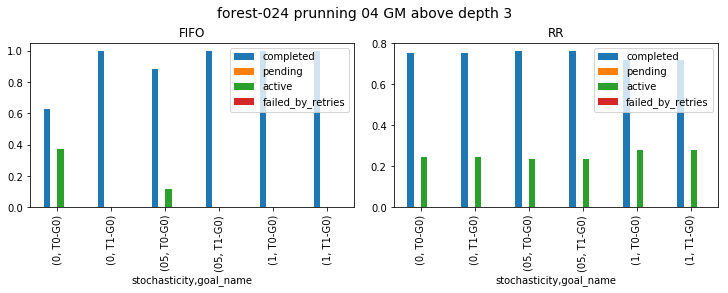

forest-025 not found


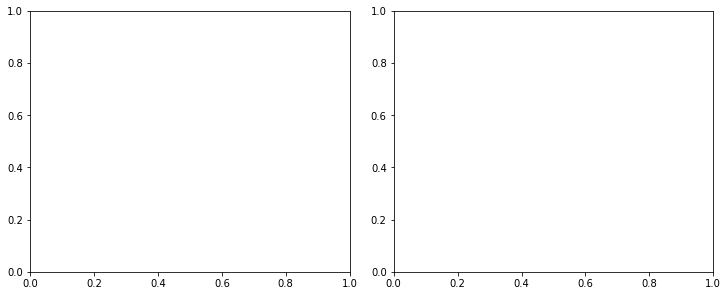

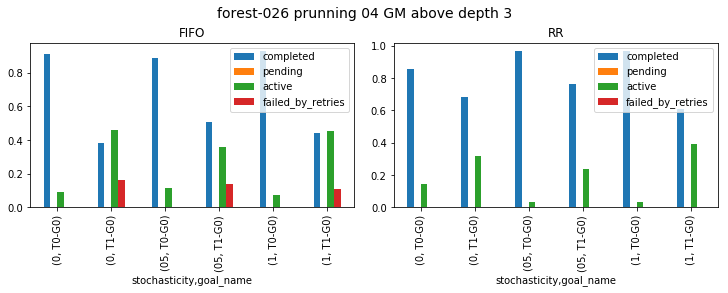

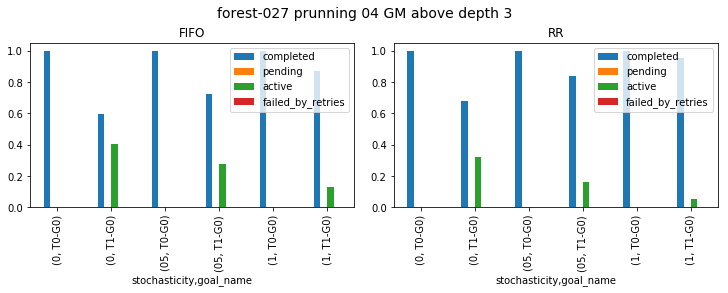

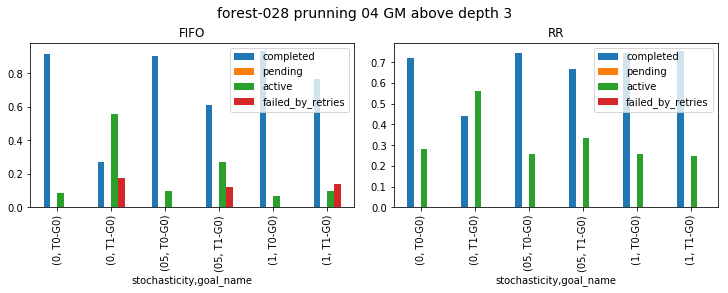

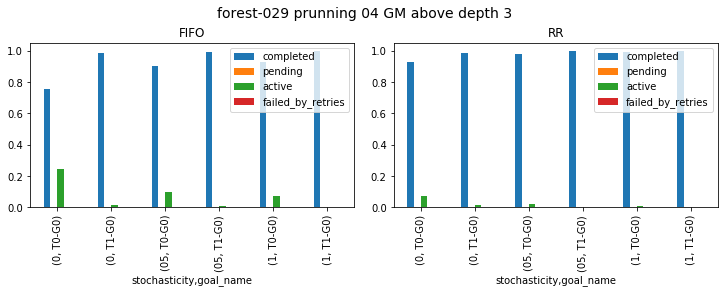

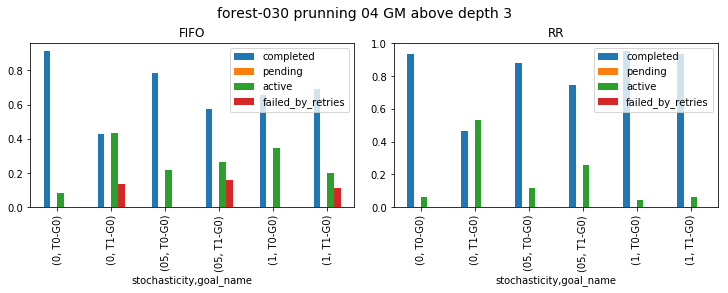

In [187]:
plot_many(df04above_ff, df04above_rr, "FIFO", "RR", "prunning 04 GM above depth 3")

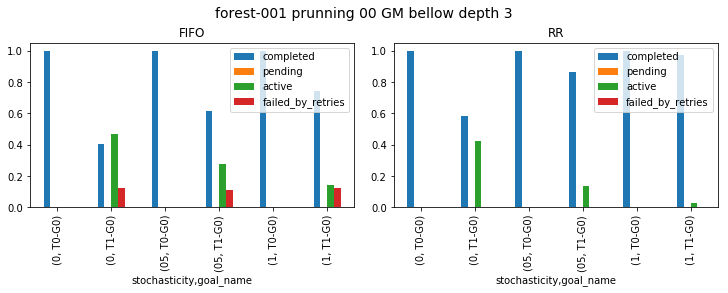

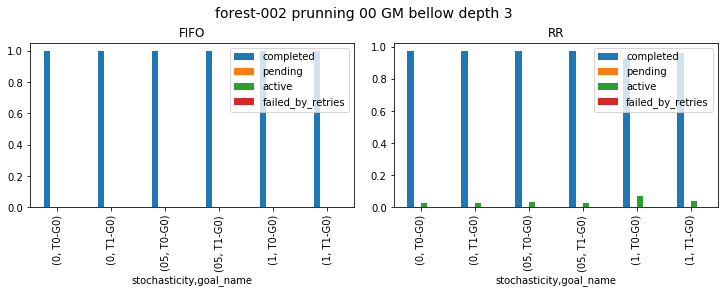

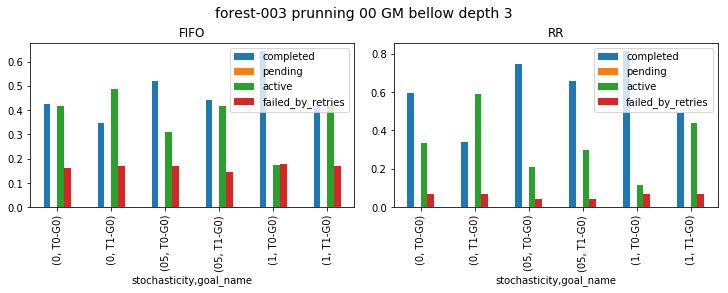

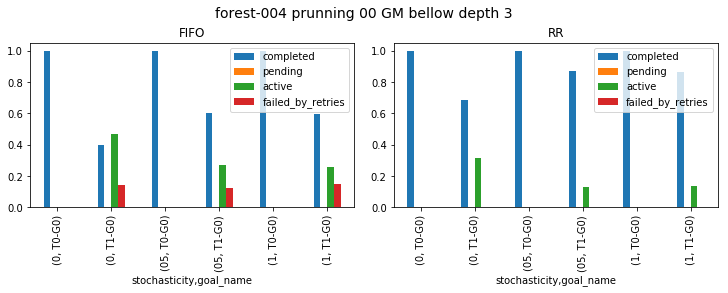

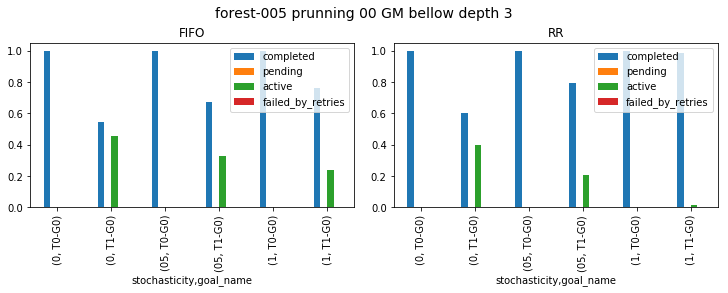

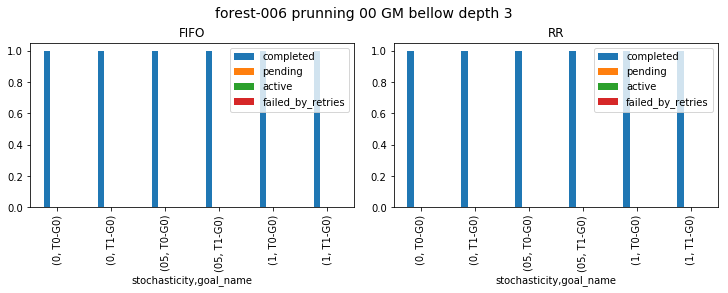

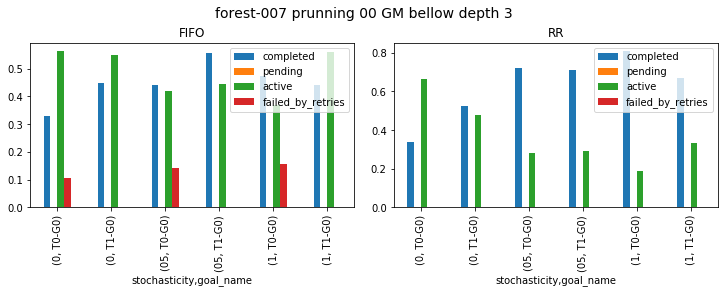

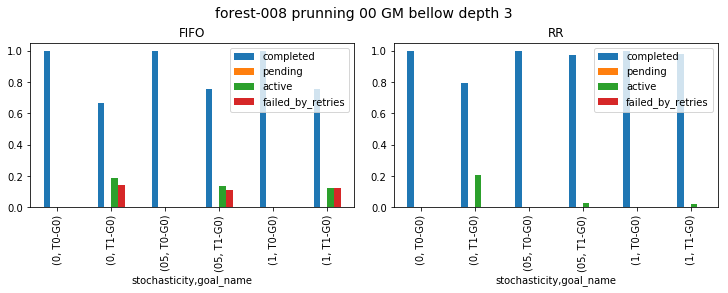

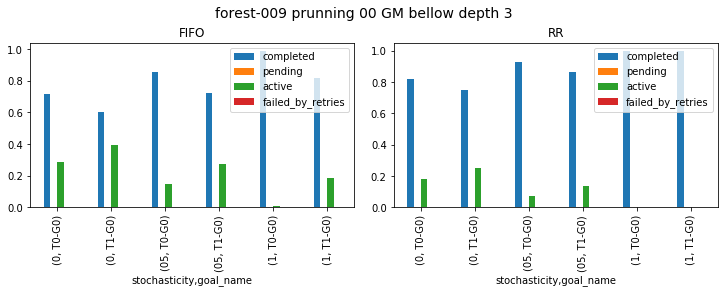

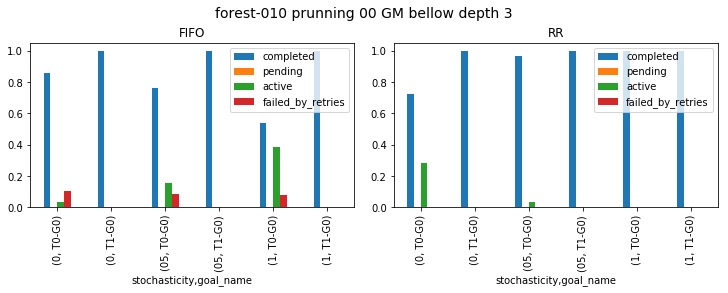

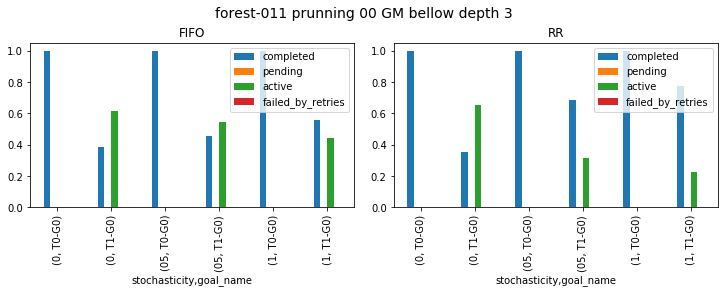

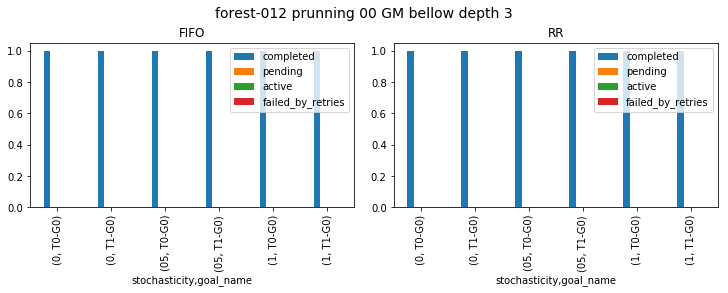

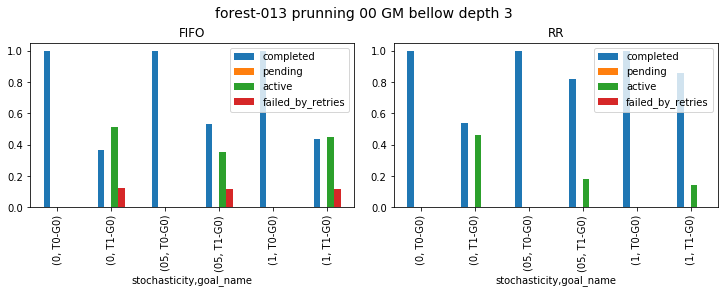

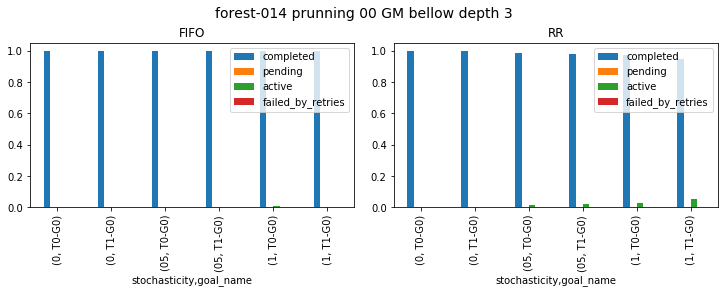

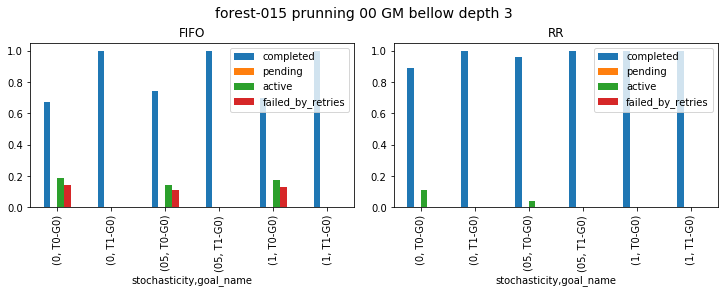

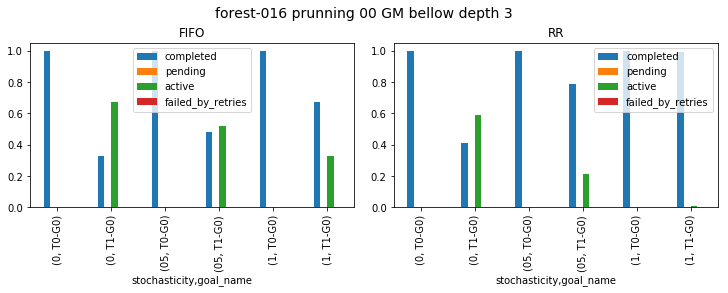

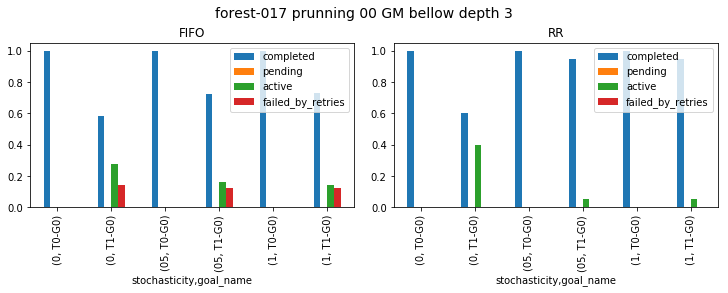

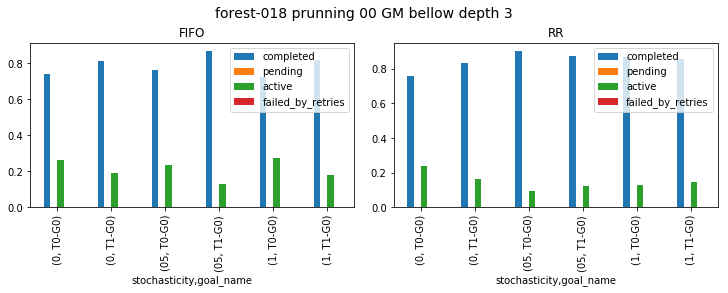

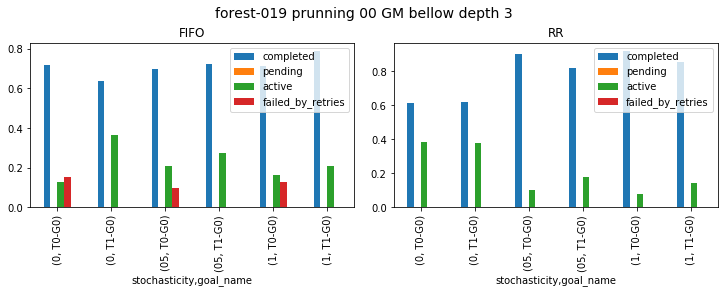

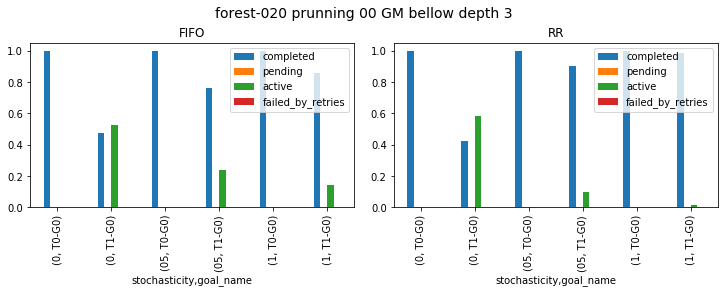

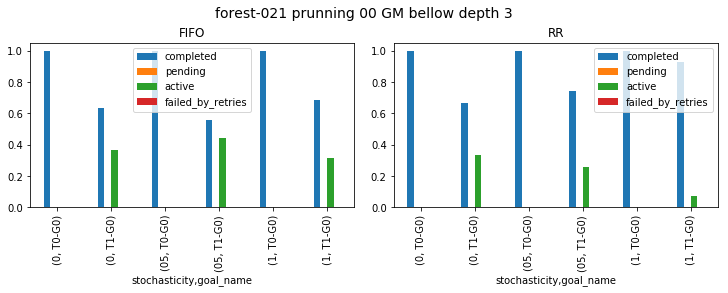

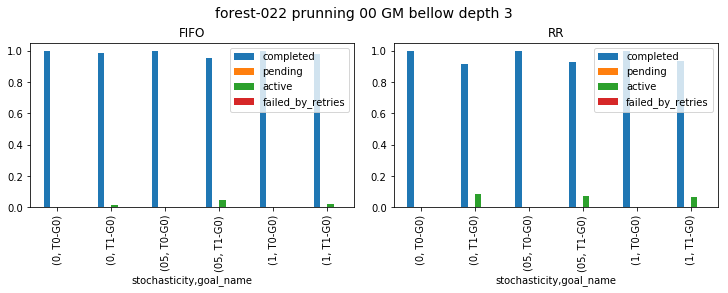

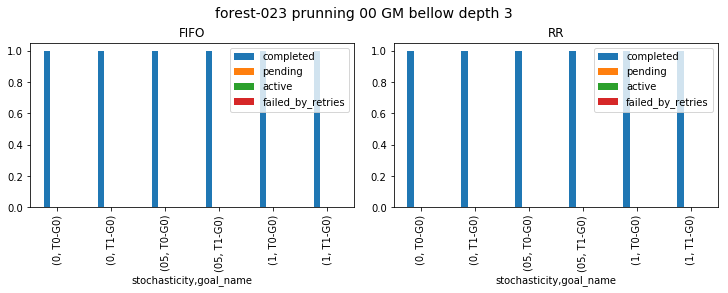

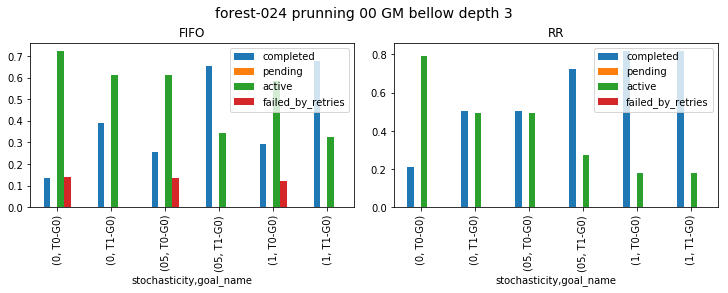

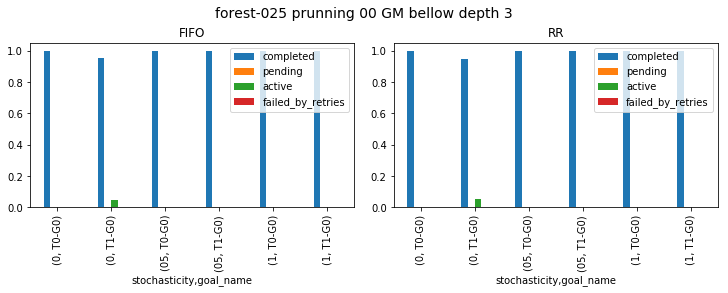

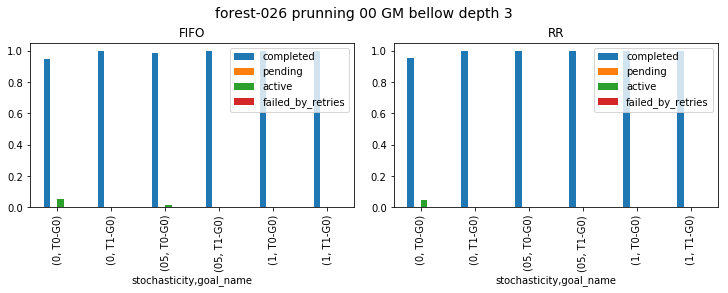

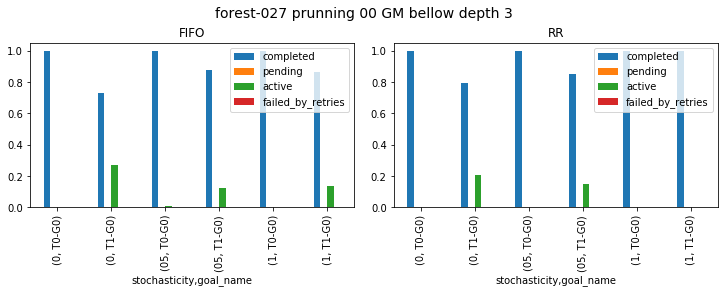

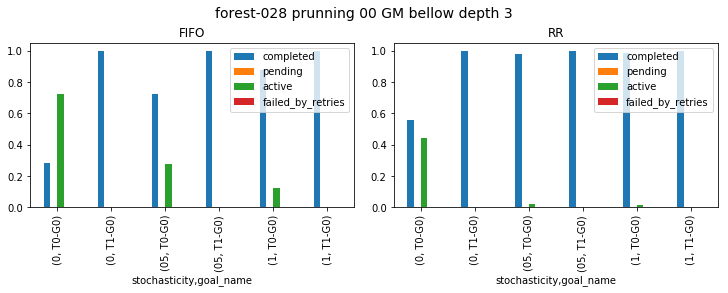

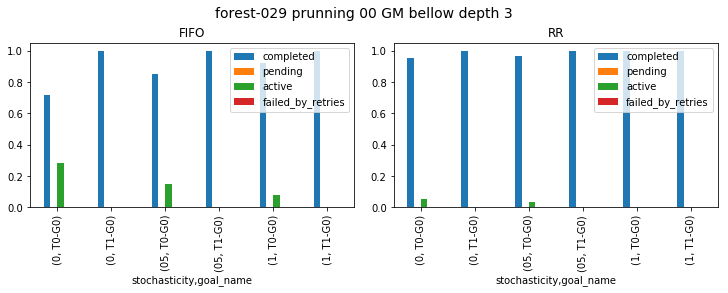

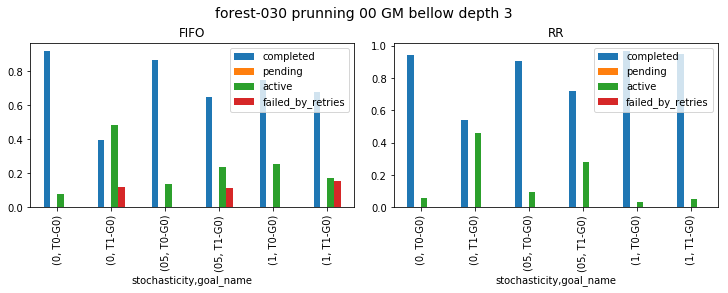

In [188]:
plot_many(df00bellow_ff, df00bellow_rr, "FIFO", "RR", "prunning 00 GM bellow depth 3")

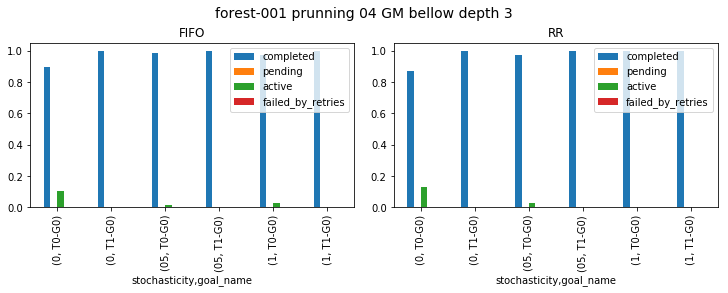

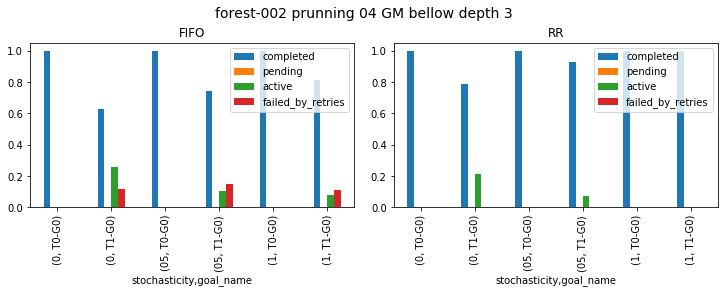

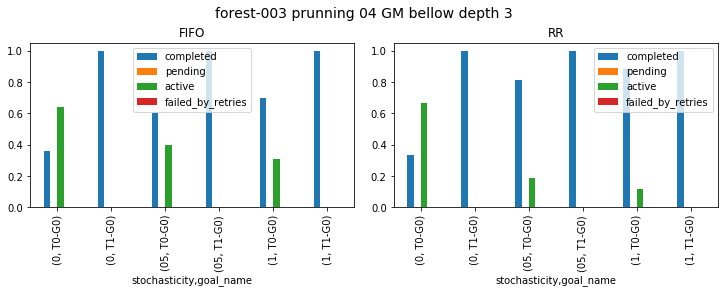

forest-004 not found


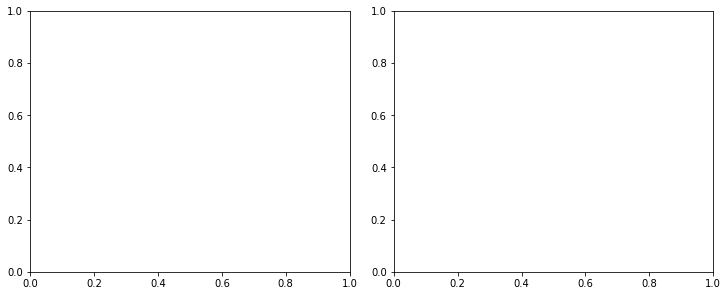

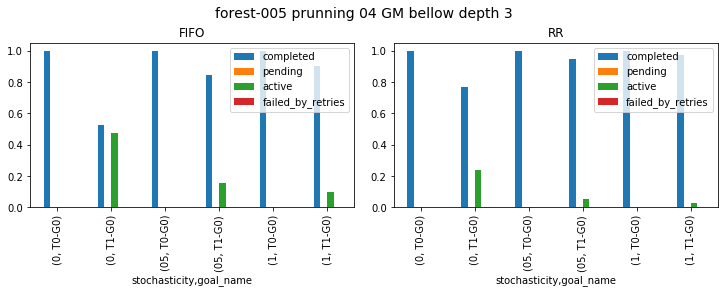

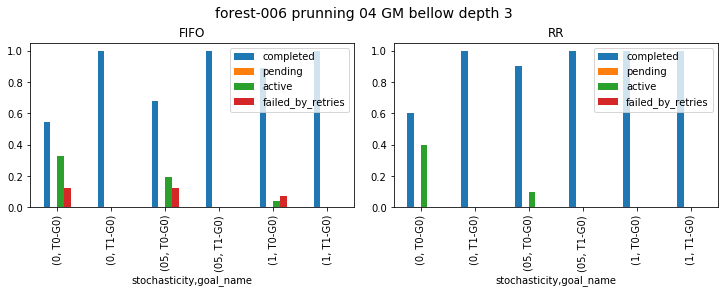

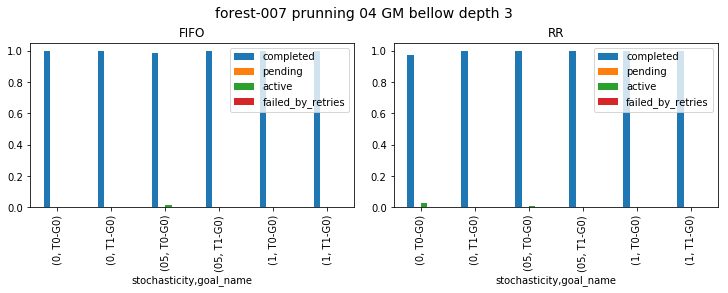

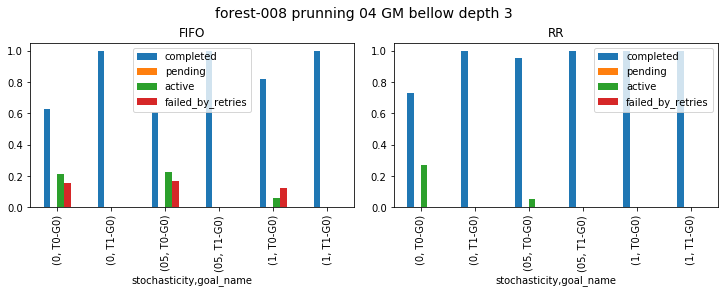

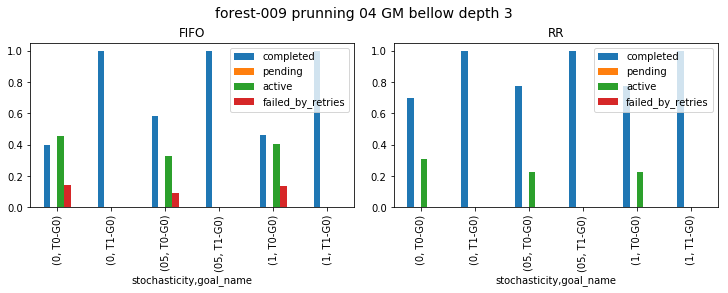

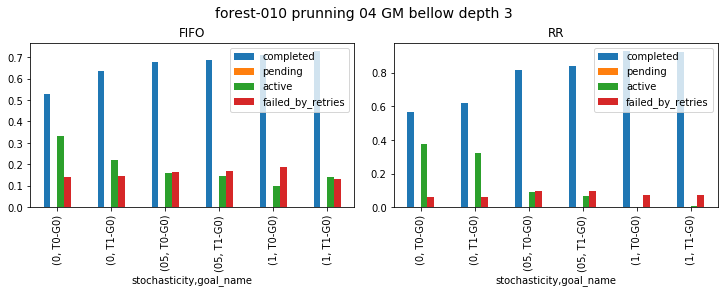

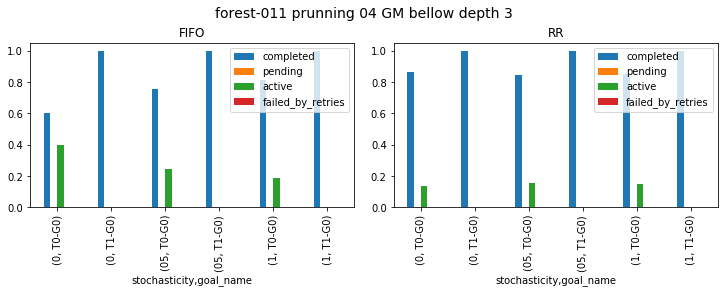

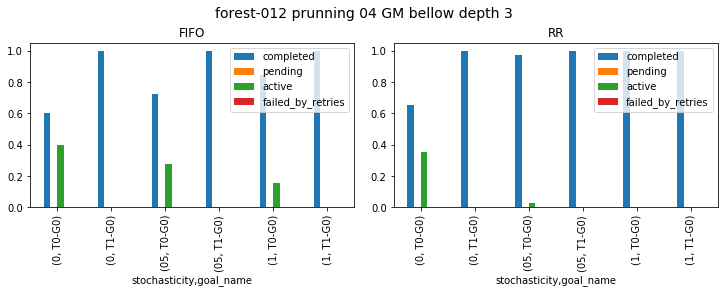

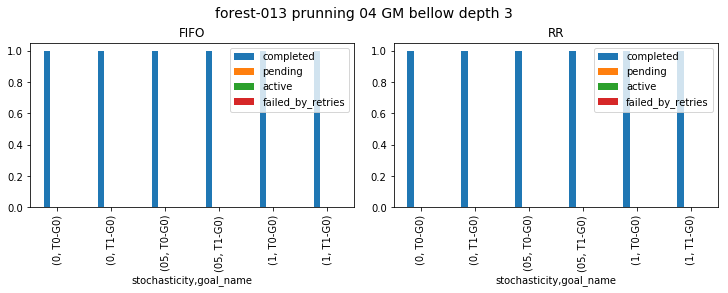

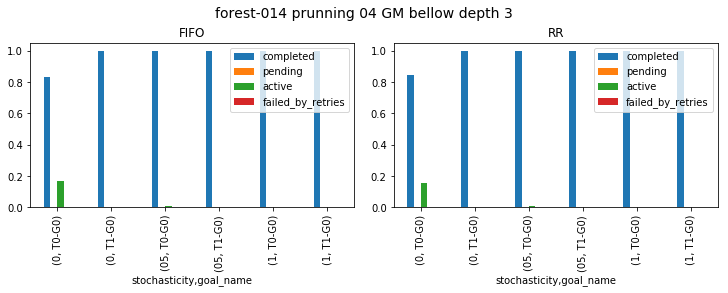

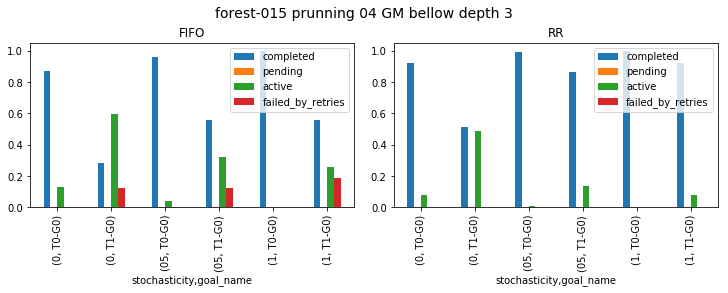

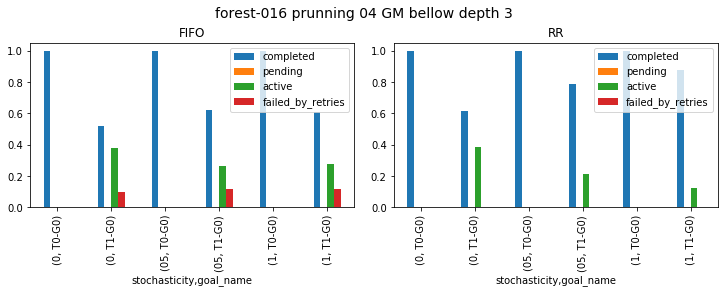

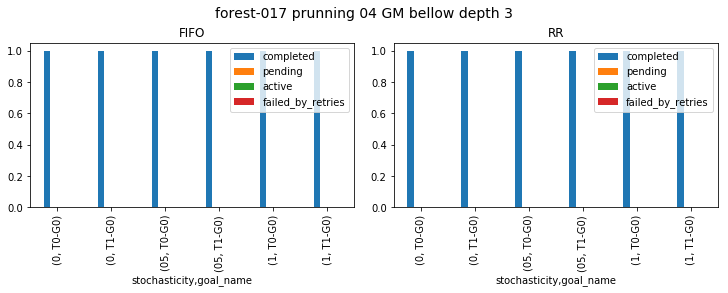

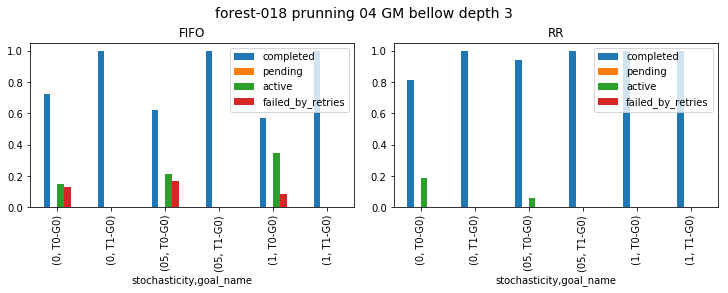

forest-019 not found


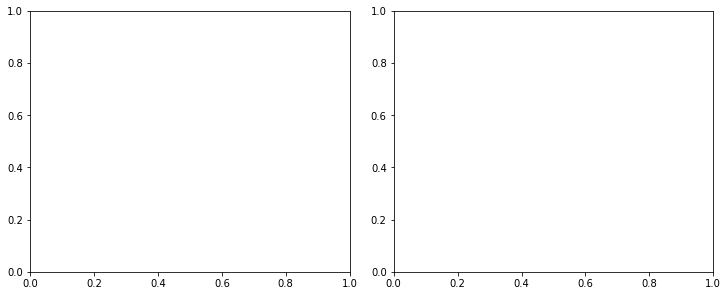

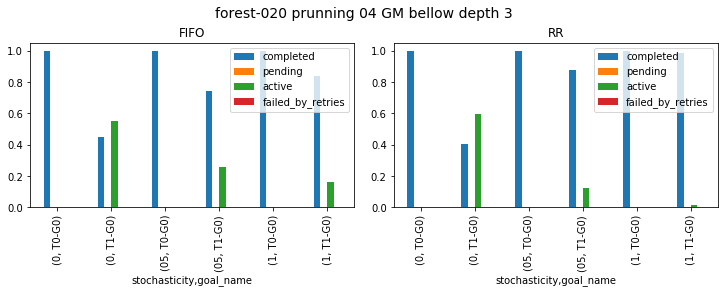

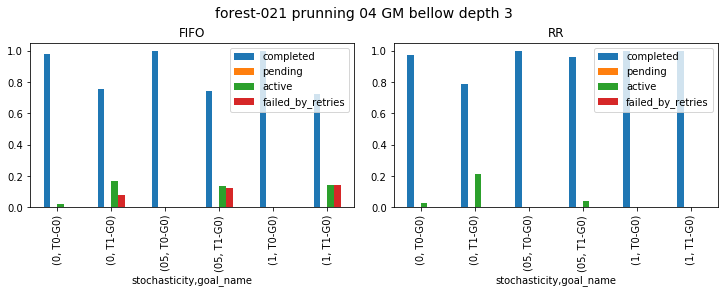

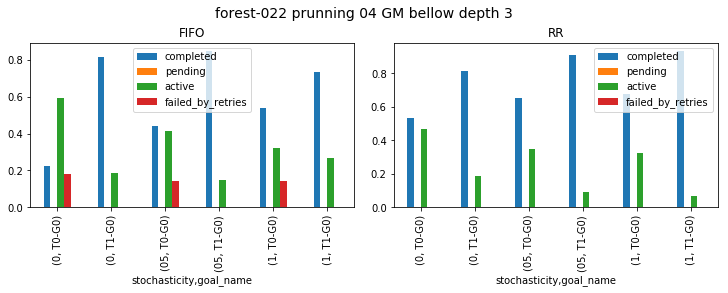

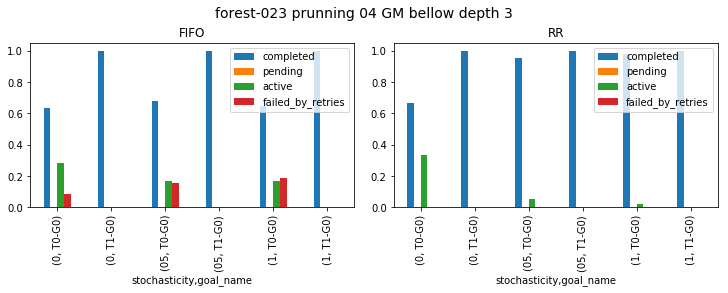

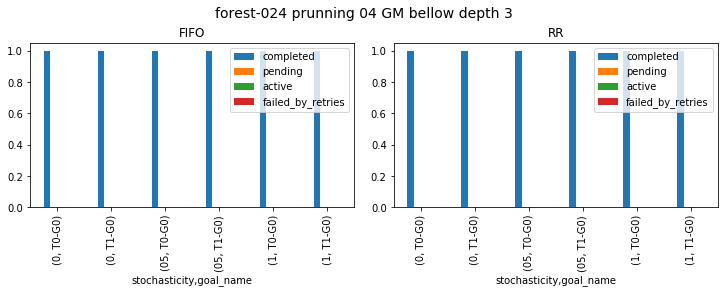

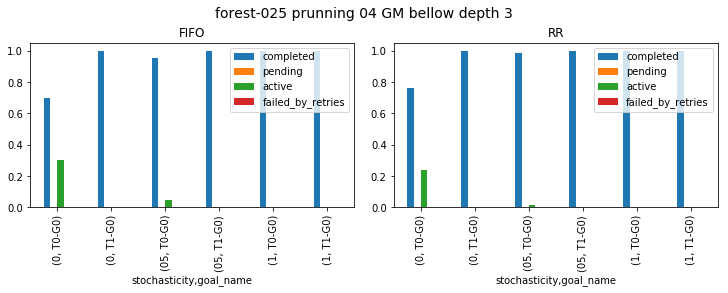

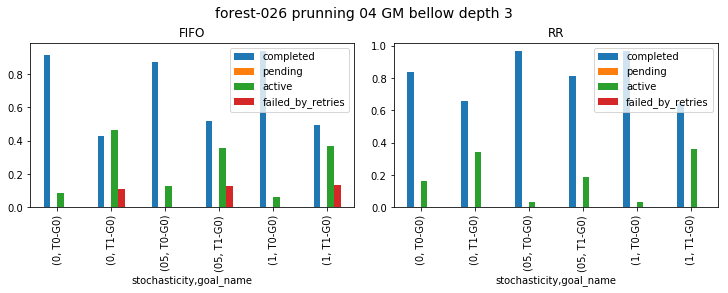

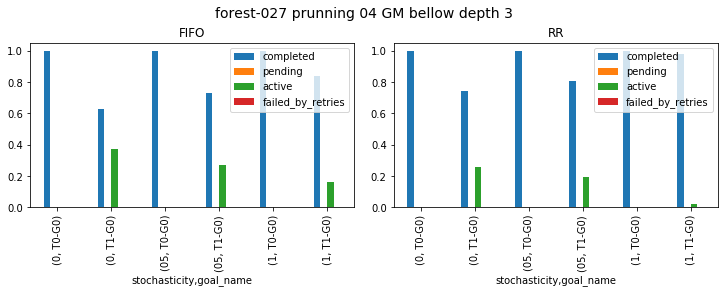

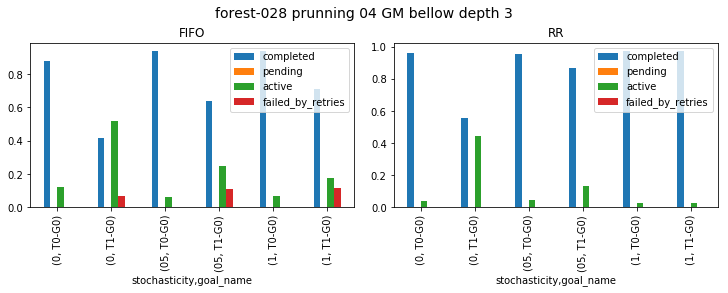

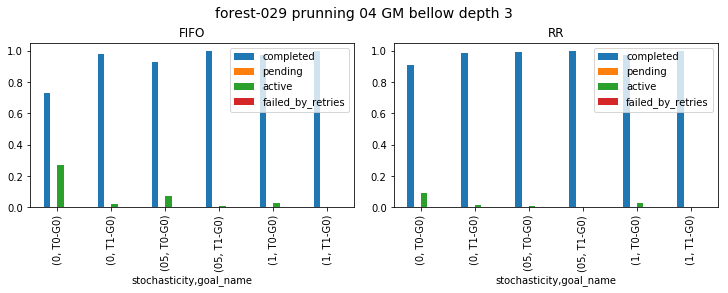

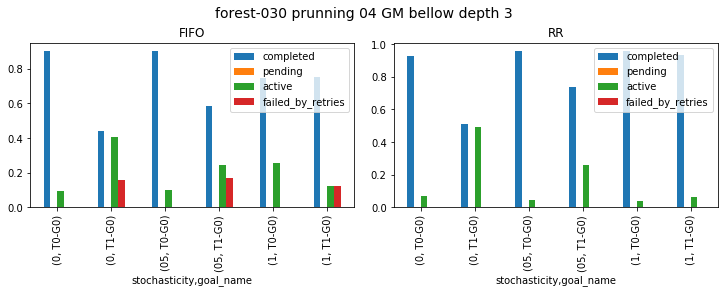

In [189]:
plot_many(df04bellow_ff, df04bellow_rr, "FIFO", "RR", "prunning 04 GM bellow depth 3")

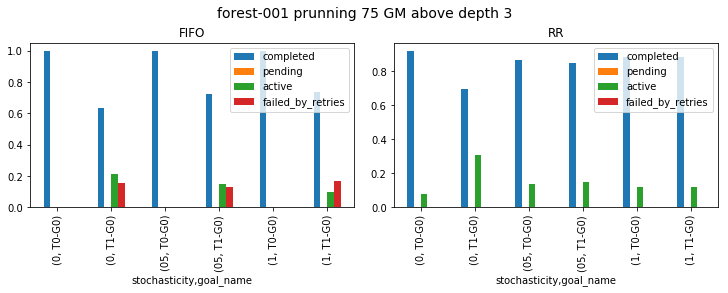

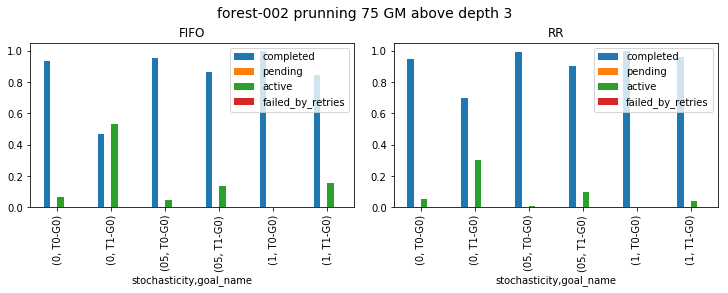

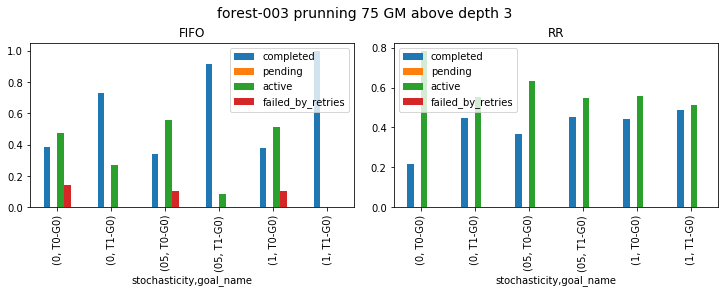

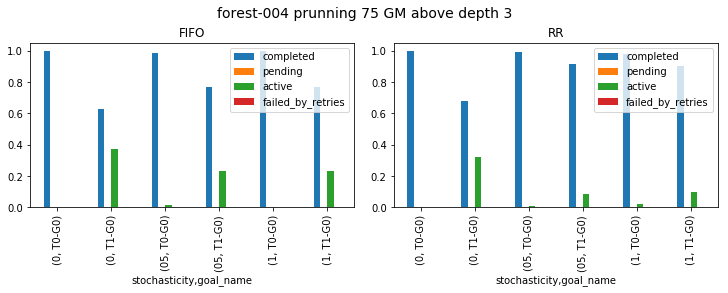

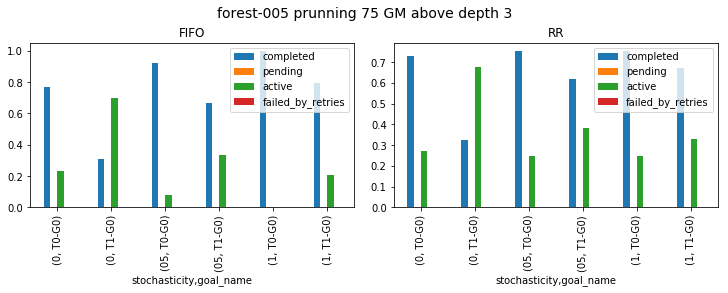

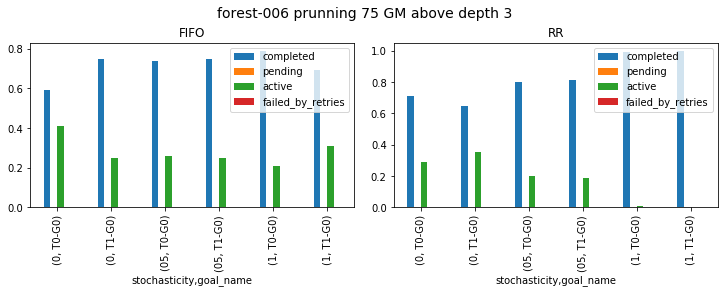

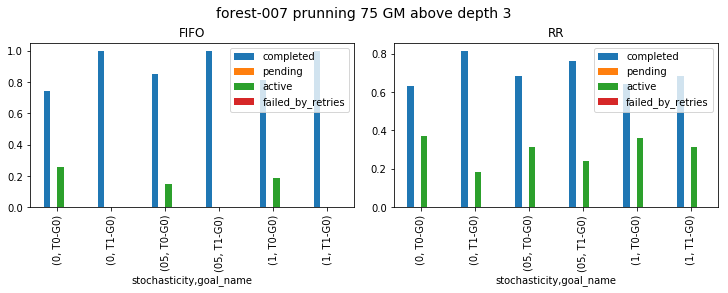

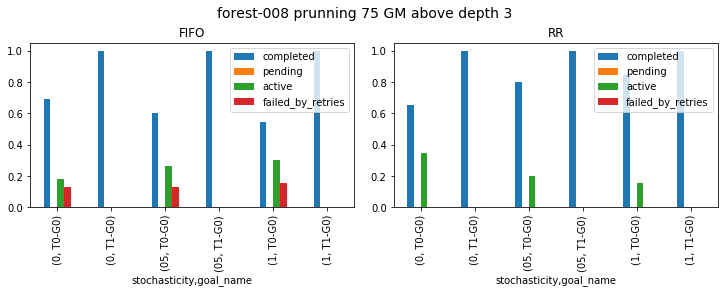

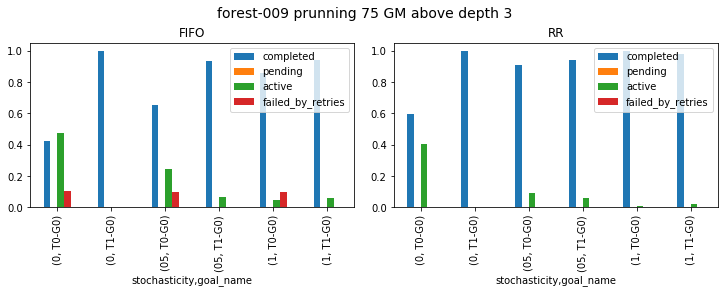

forest-010 not found


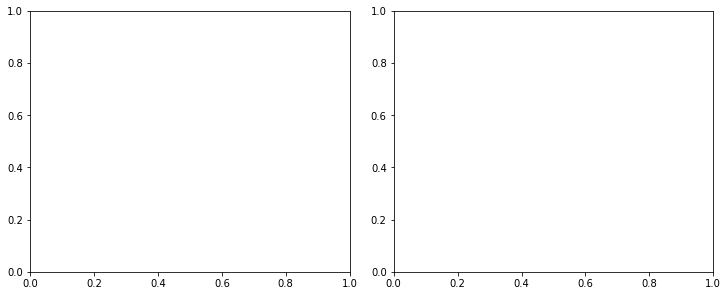

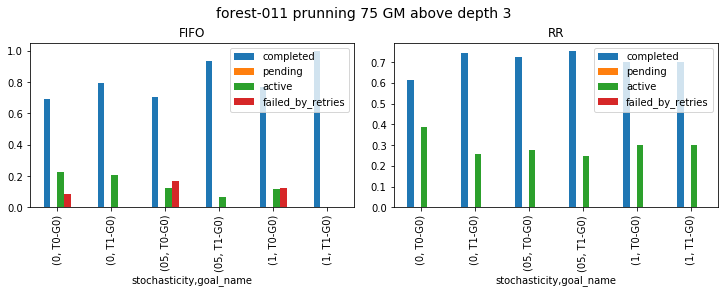

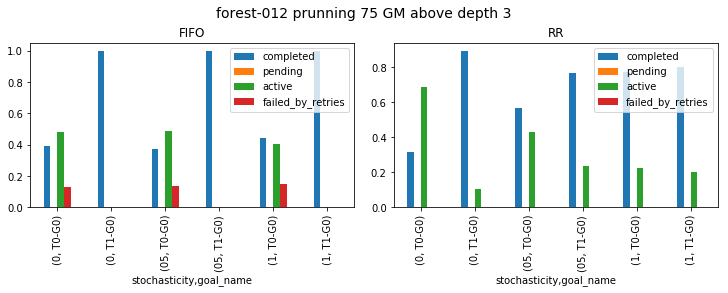

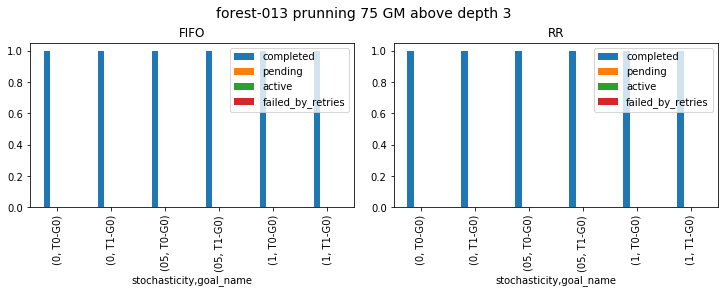

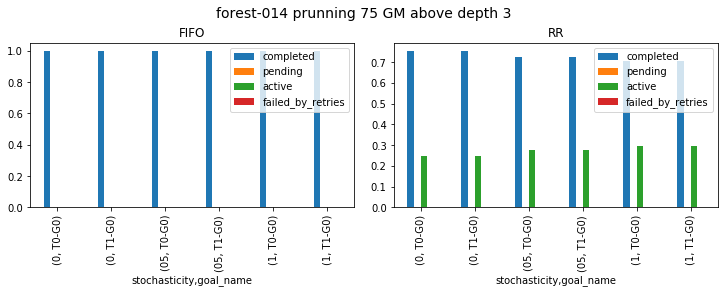

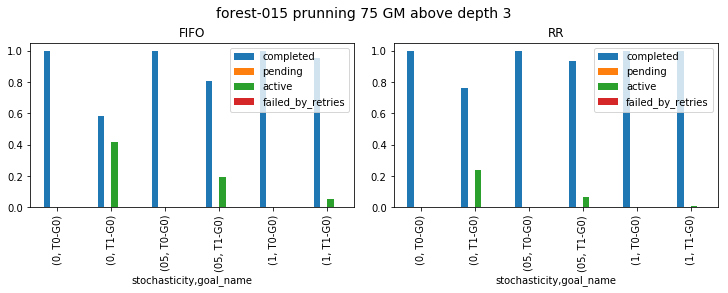

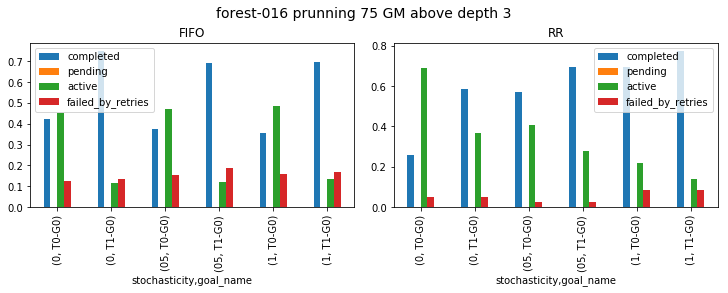

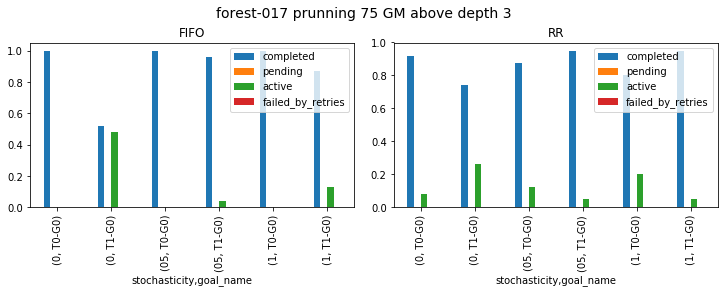

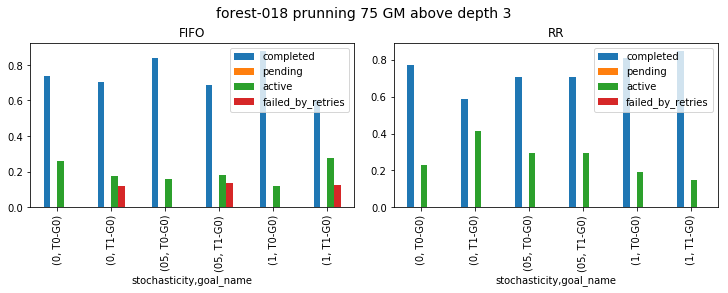

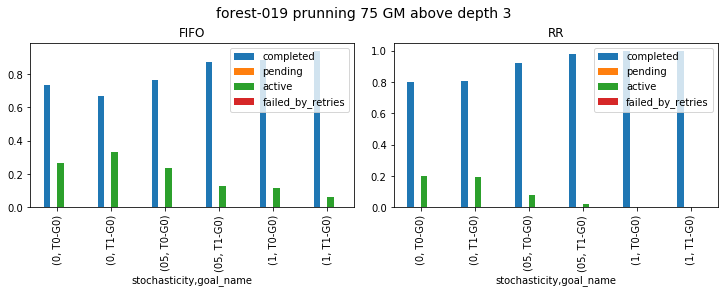

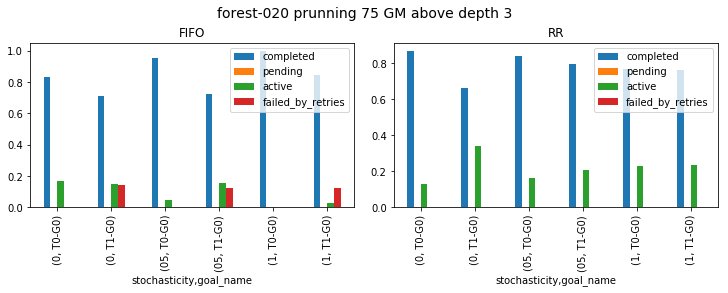

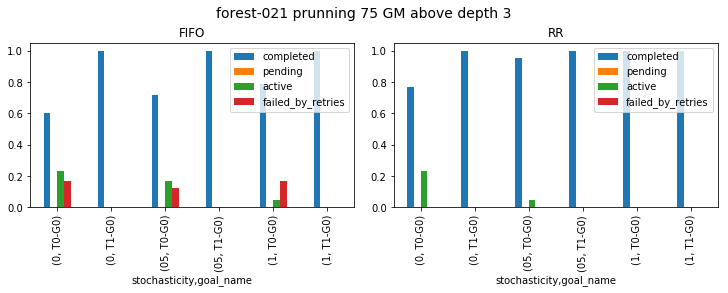

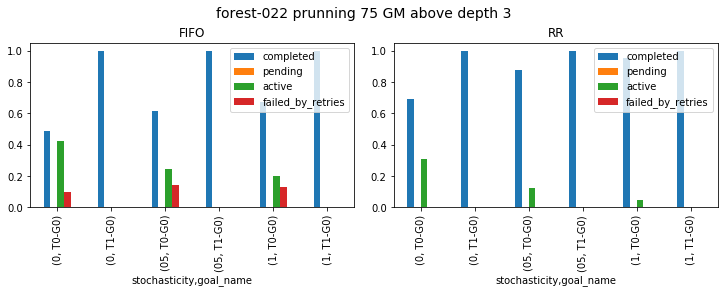

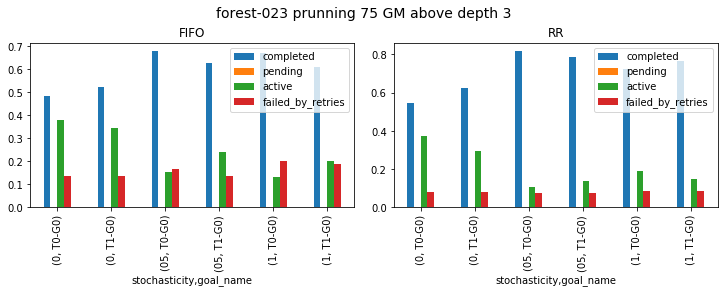

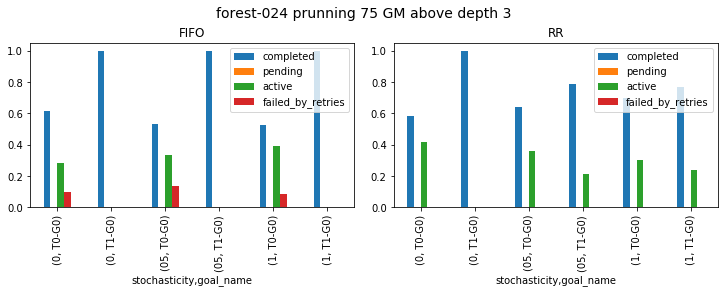

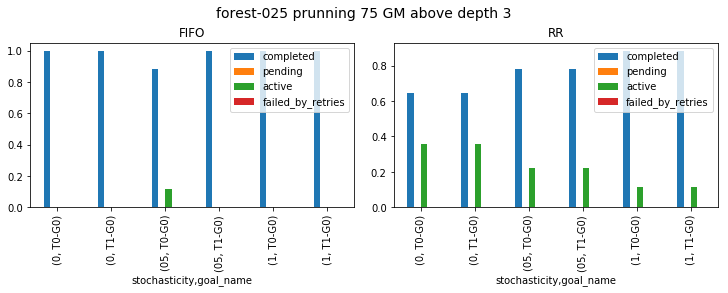

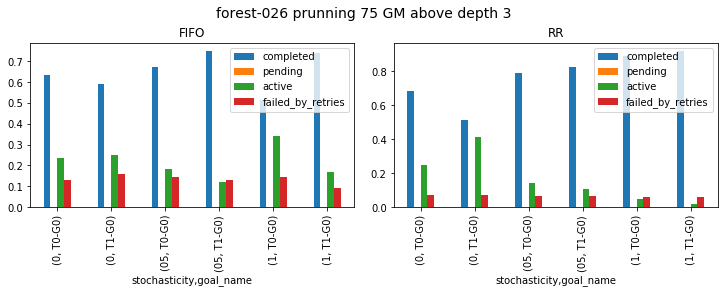

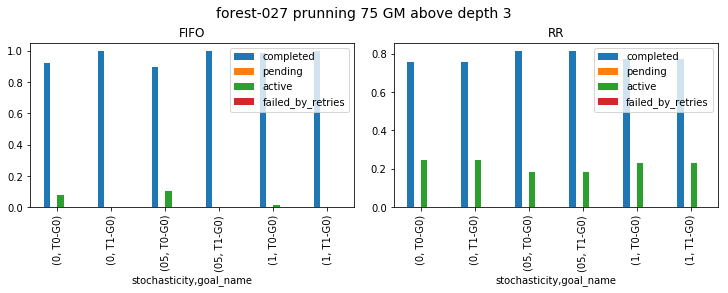

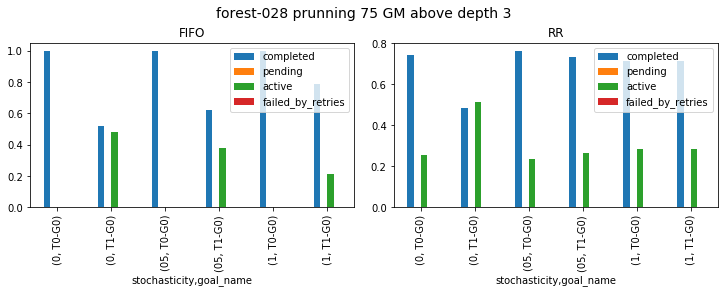

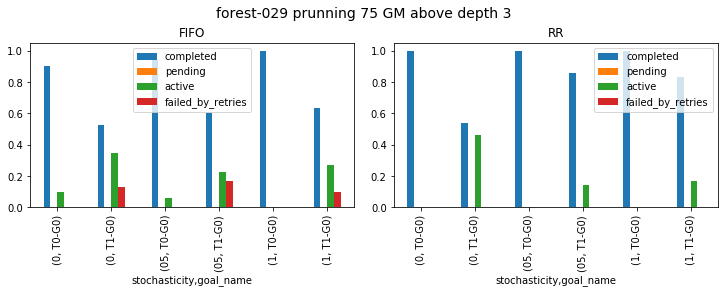

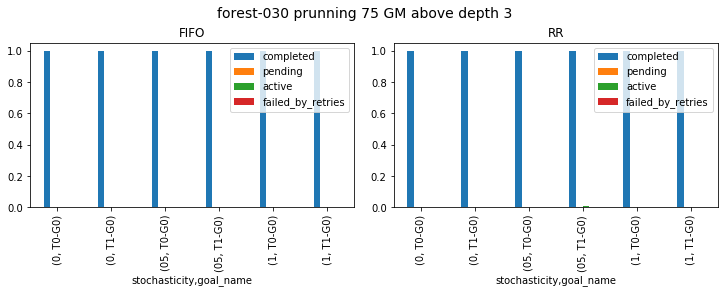

In [190]:
plot_many(df75above_ff, df75above_rr, "FIFO", "RR", "prunning 75 GM above depth 3")

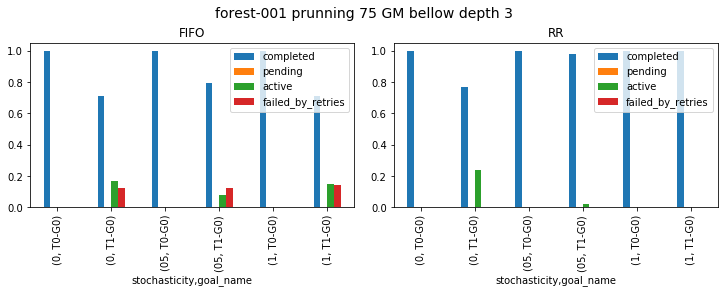

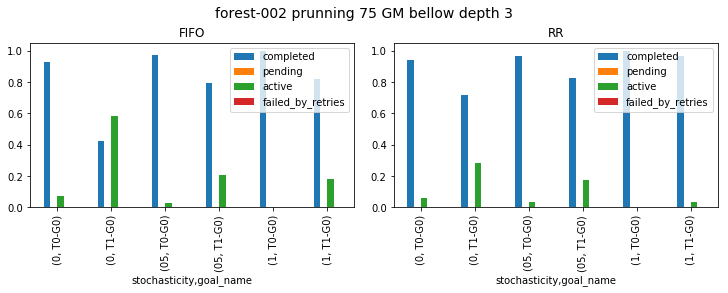

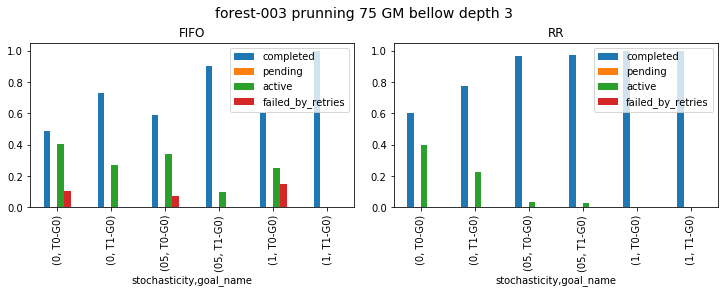

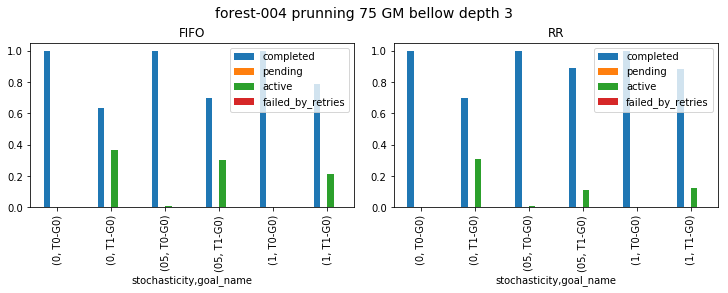

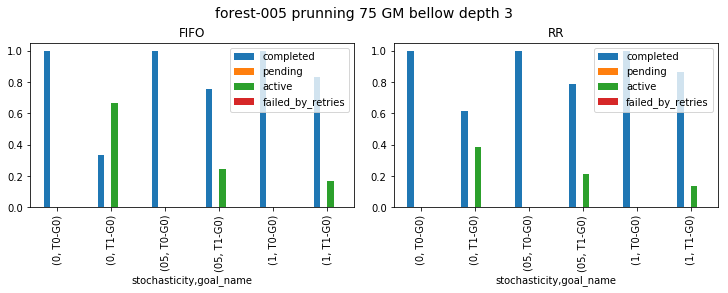

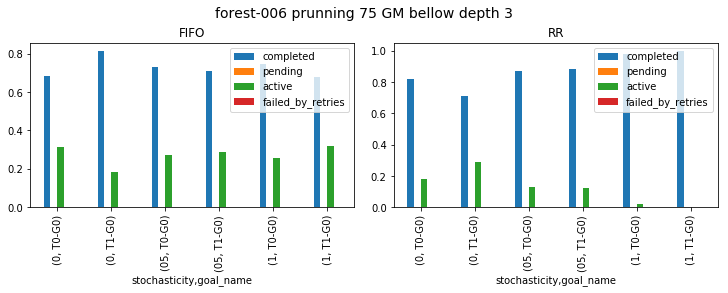

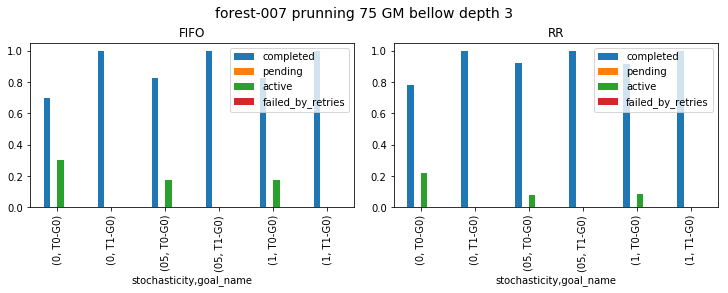

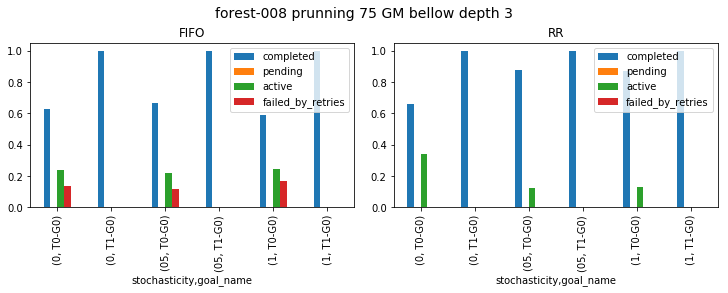

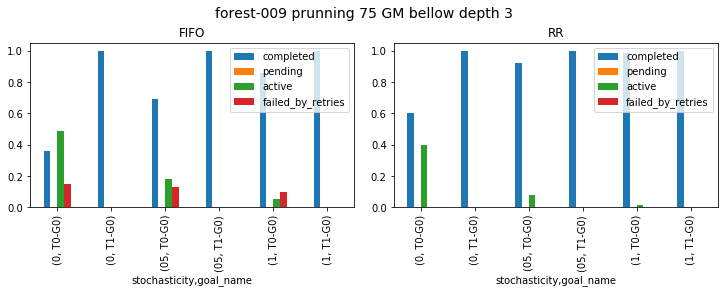

forest-010 not found


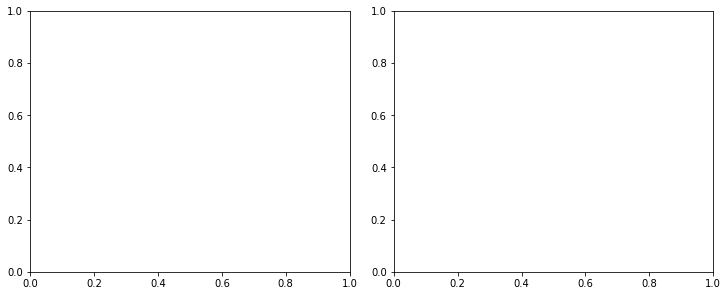

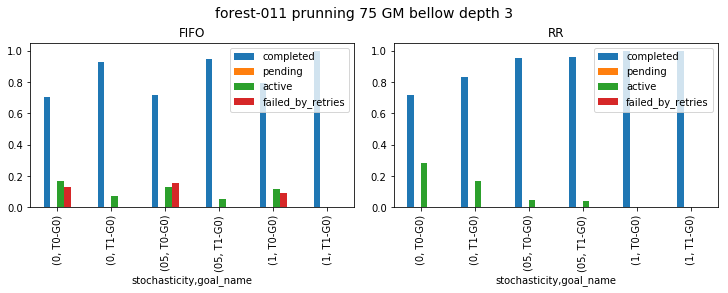

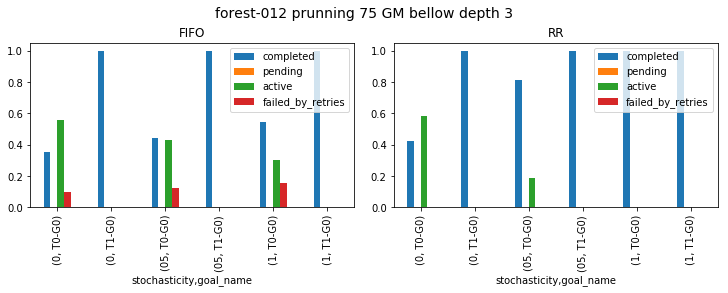

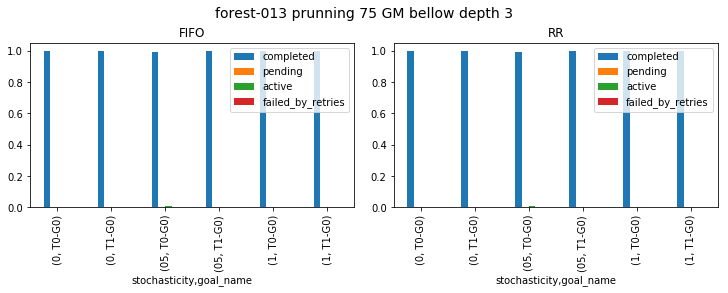

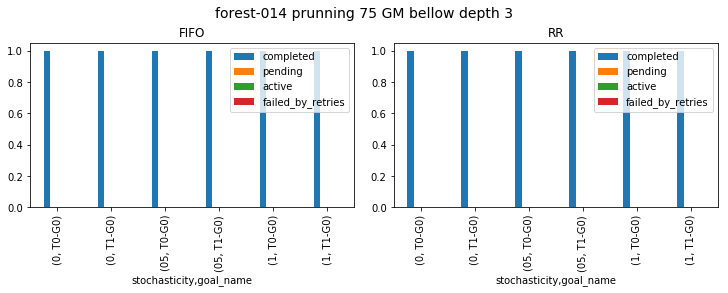

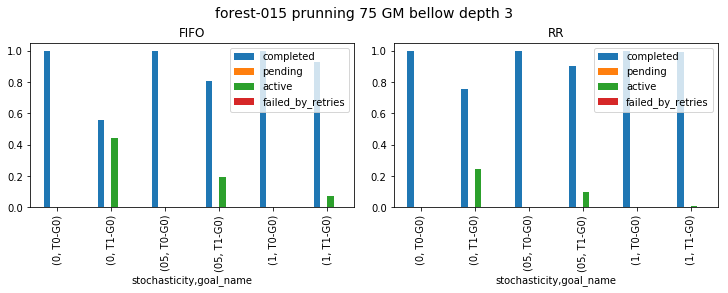

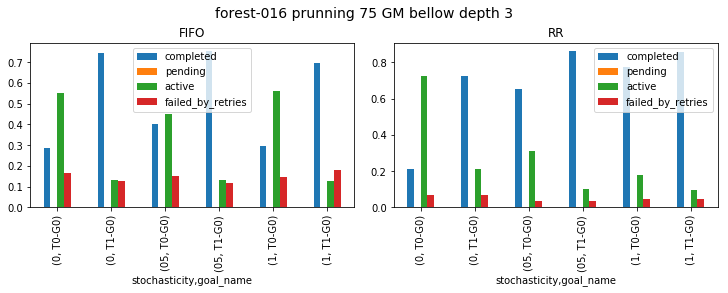

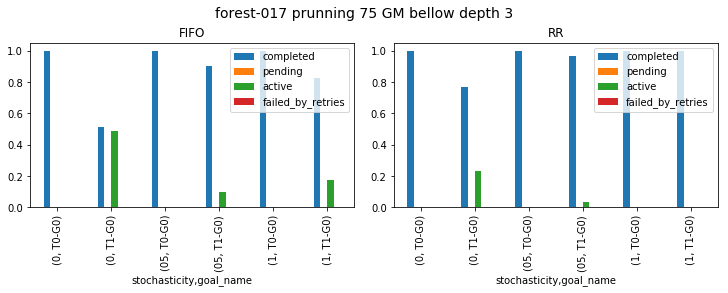

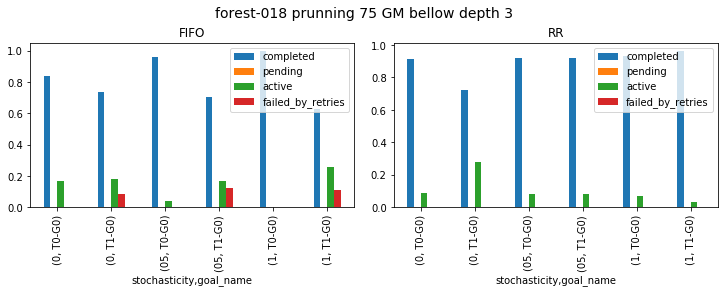

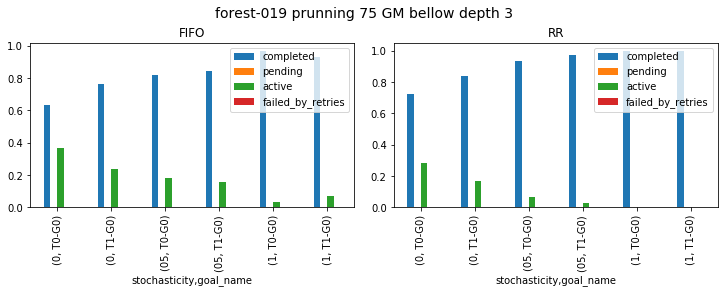

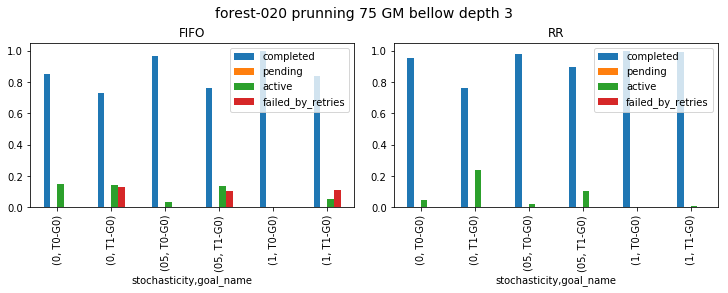

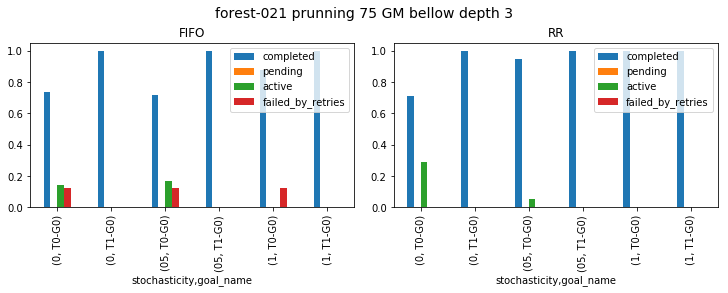

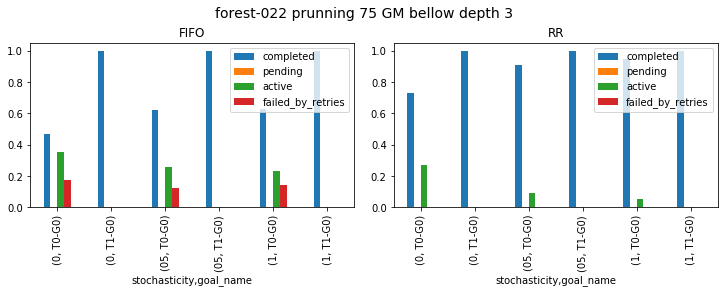

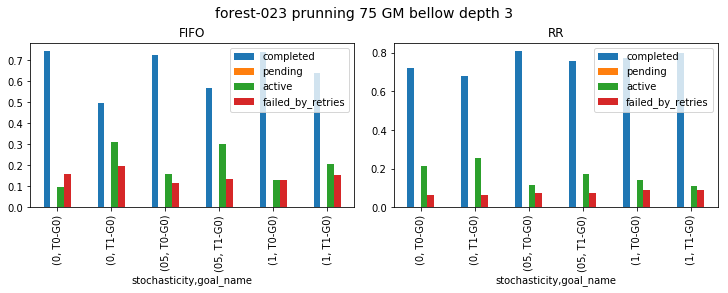

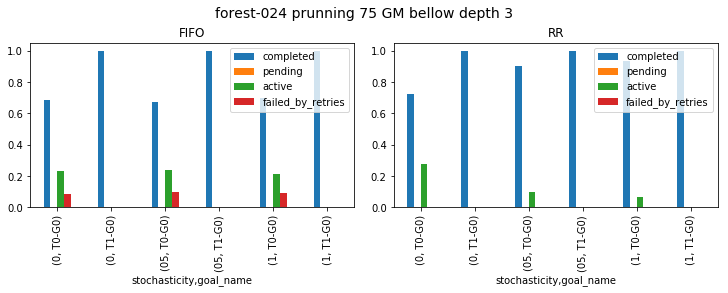

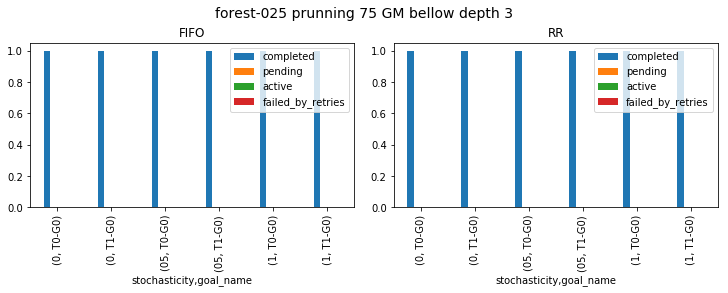

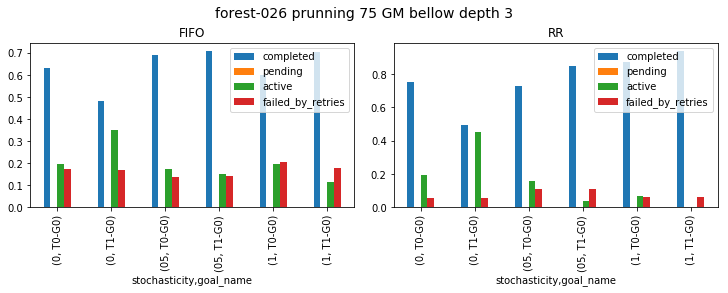

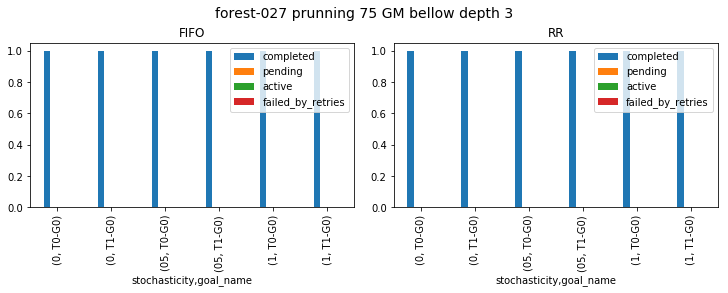

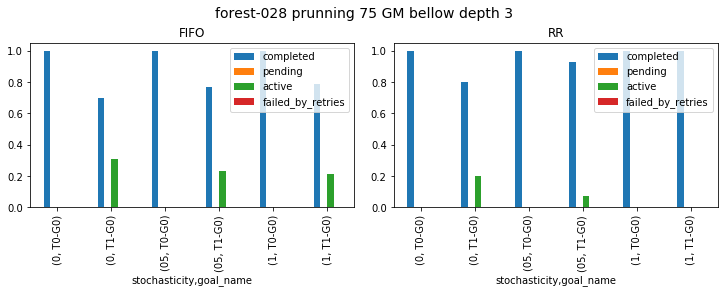

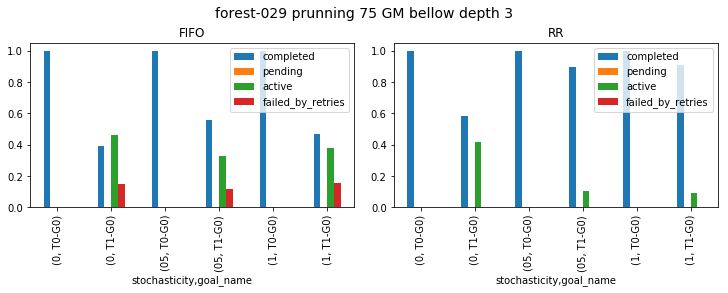

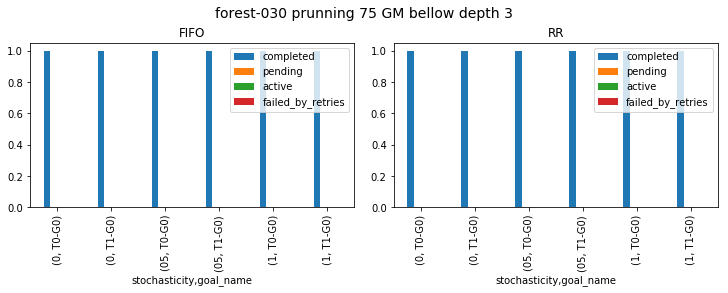

In [191]:
plot_many(df75bellow_ff, df75bellow_rr, "FIFO", "RR", "prunning 75 GM bellow depth 3")

In [192]:
# plot_many(df00above_00_ff, df00above_00_rr, "FIFO", "RR", "prunning 04 GM below depth 3 -d 0")

In [193]:
def plot_many3(df0, df1, title0, title1, loc, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            
            df0_new = get_proportion_df(df0_copy)
            df1_new = get_proportion_df(df1_copy)
            
            if(tree_loc[i][loc] == 0):
                df0_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df0_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
        
                df1_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
                df1_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
            else:
                df0_new["goal_name"].replace('T1-G0', 'T1-G0, has GM', inplace=True)
                df0_new["goal_name"].replace('T0-G0', 'T0-G0, no GM', inplace=True)
                
                df1_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
                df1_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                

            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))

            df0_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[0])

            df1_new.groupby(['goal_name']).sum().plot(kind='bar' , ax=axs[1])

            axs[1].set_title(title1)
            axs[0].set_title(title0)
            plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=0 )
            fig.suptitle((file_name + " " + category), fontsize=14)
            
            plt.show()
        except Exception as e:
            print(e)
            print(file_name + " not found")

        

In [25]:
def plot_all2(df_list, titles, title):
    nrow=1
    ncol=2
    fig, axes = plt.subplots(nrow, ncol)
    fig.suptitle(title, fontsize=16)


    count=0
    for r in range(nrow):
        for c in range(ncol):
            
            df = df_list[count][['completed', 'pending', 'active', 'failed_by_retries']]
            
#             print(titles[count])
            
            ax = df.astype(float).plot(ax=axes[r,c], kind='box', title=titles[count] , figsize=(12,8))
            for p in ax.patches:
                ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

            plt.sca(axes[r,c])
            plt.xticks(np.arange(1, 5), ("C", "P", "A", "R"))

            count = count + 1
    
#     plt.title(title, x= -0.7, y = 2.4)
    plt.show()

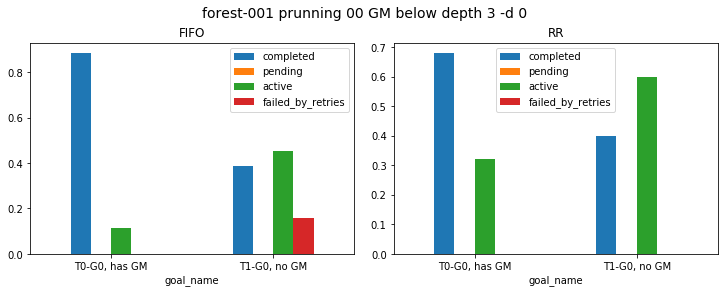

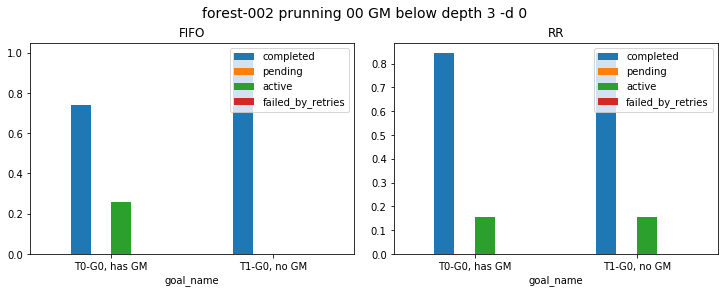

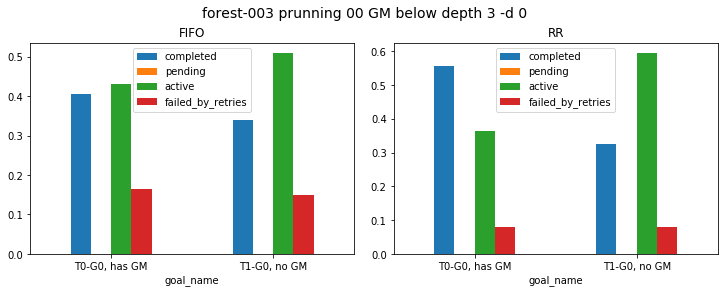

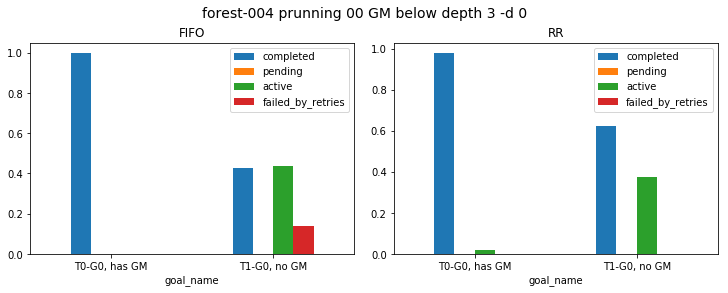

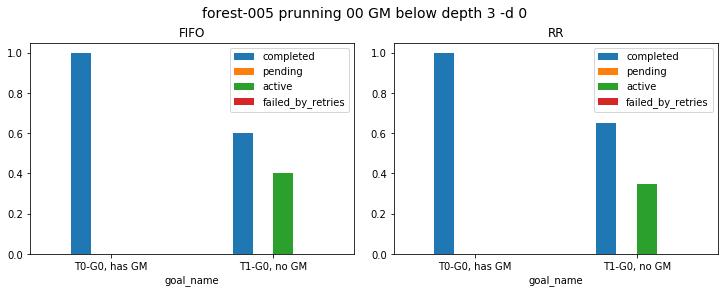

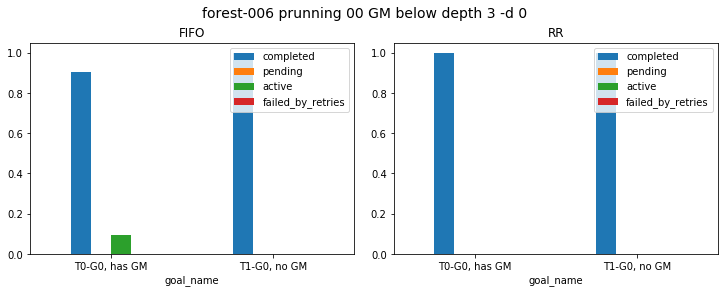

Empty 'DataFrame': no numeric data to plot
forest-007 not found


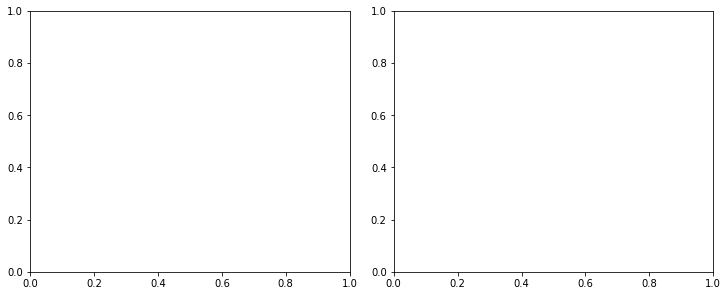

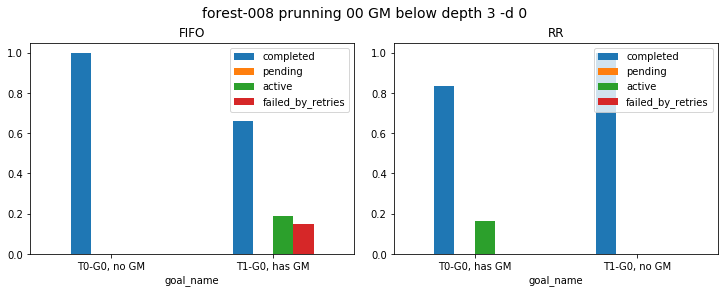

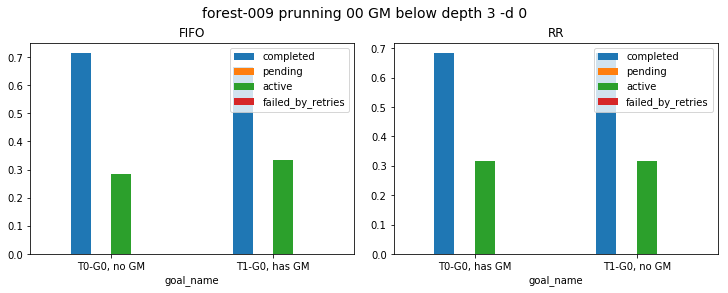

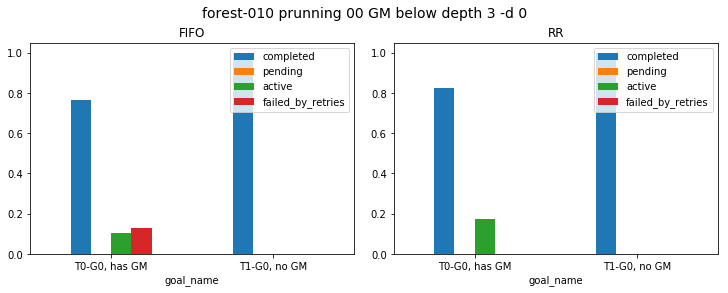

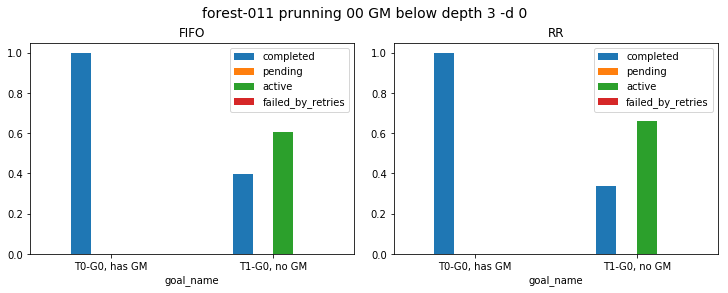

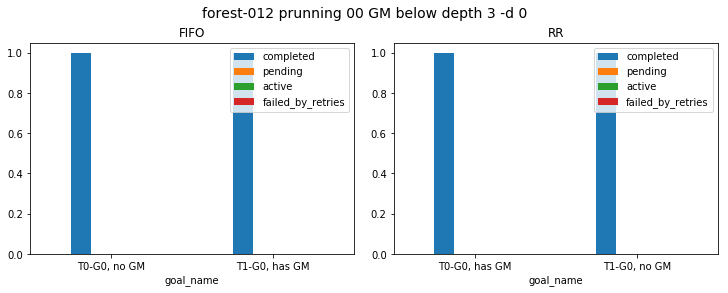

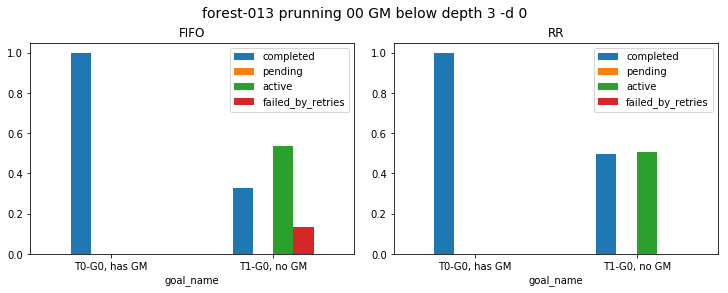

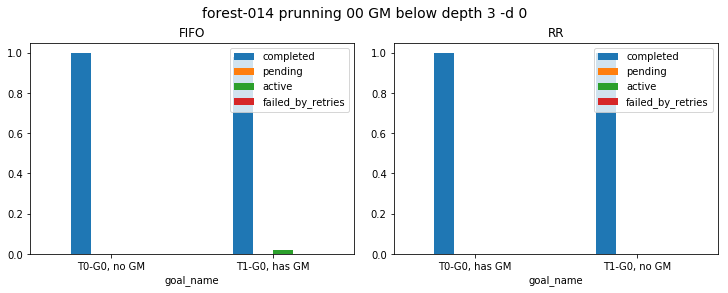

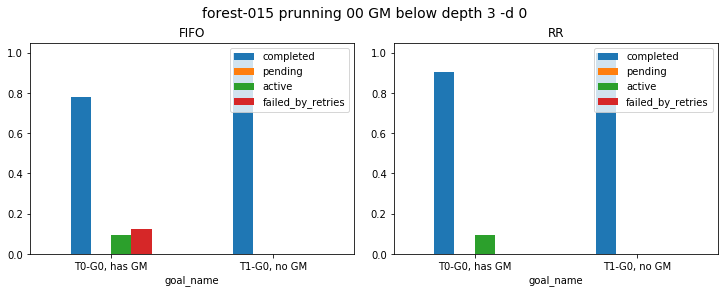

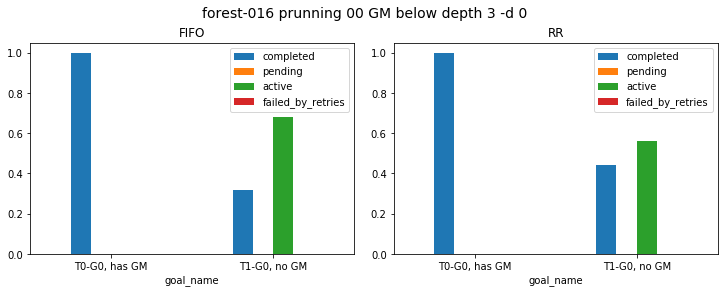

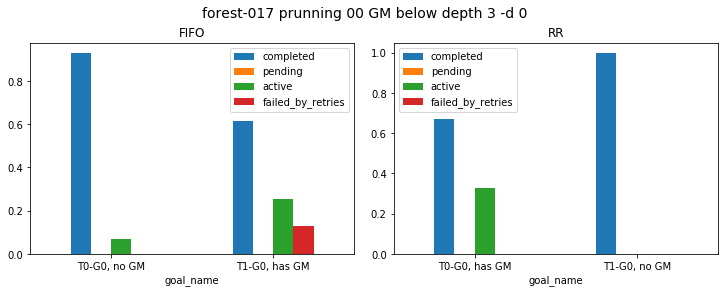

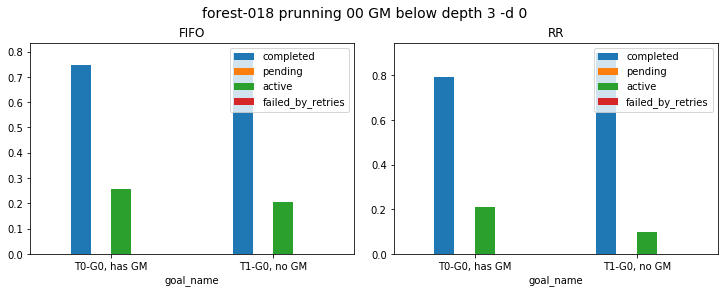

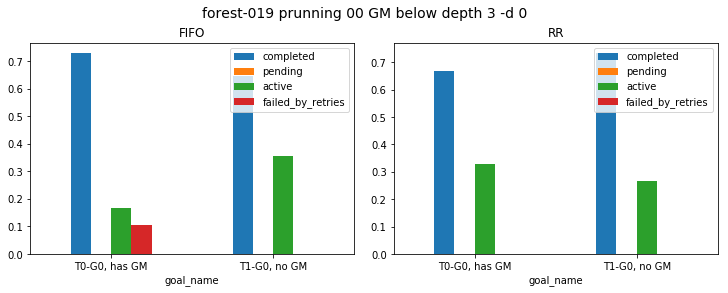

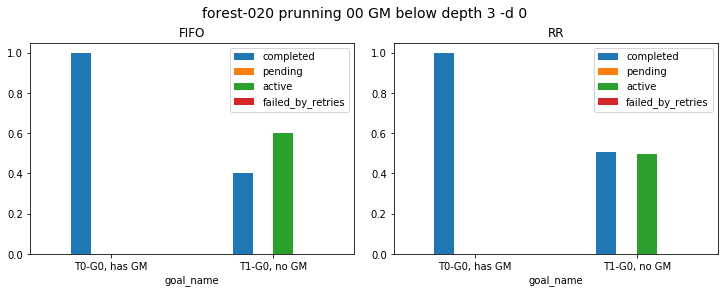

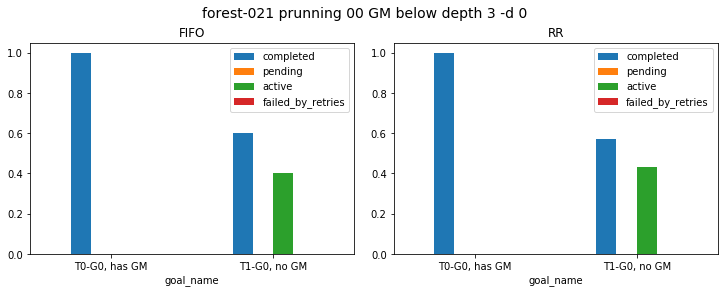

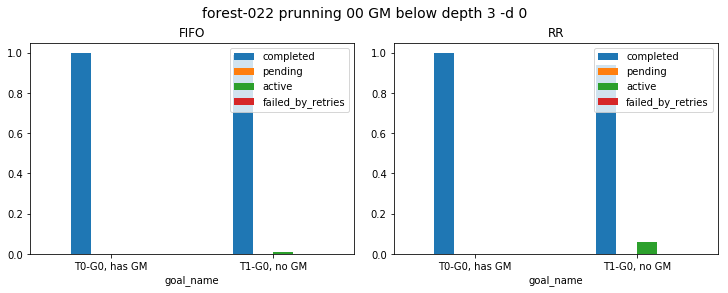

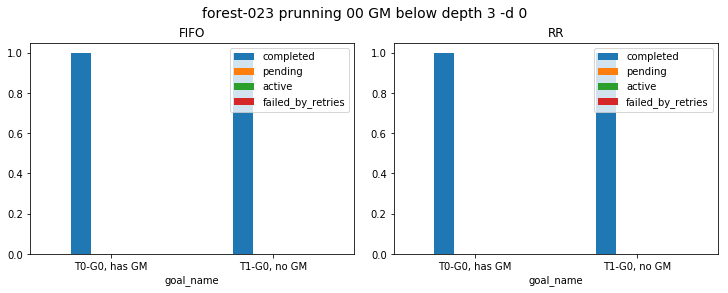

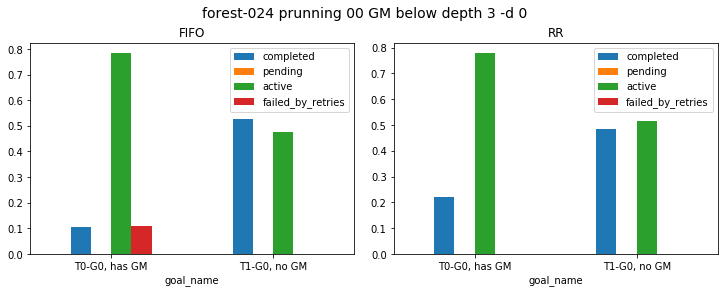

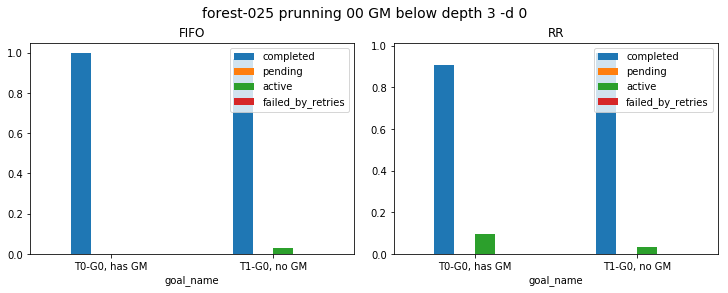

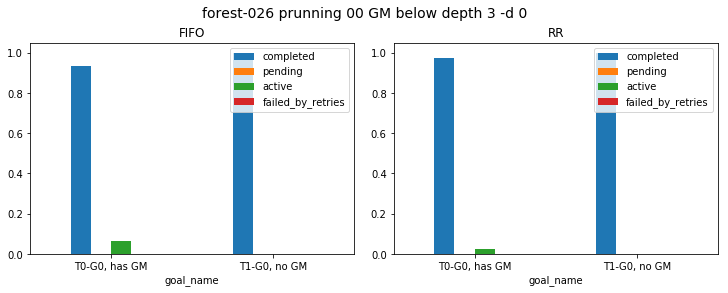

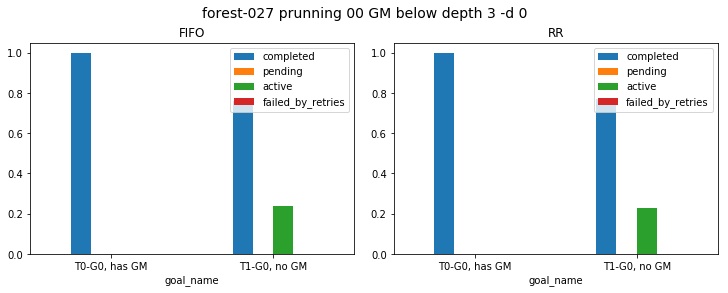

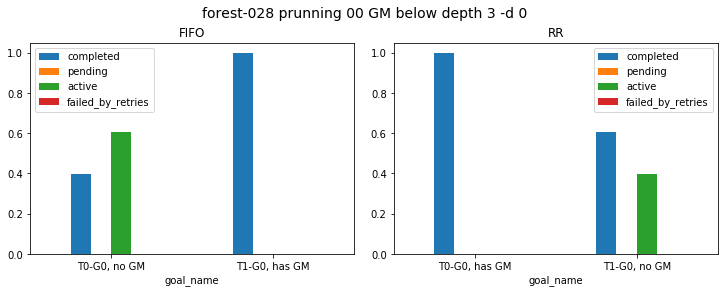

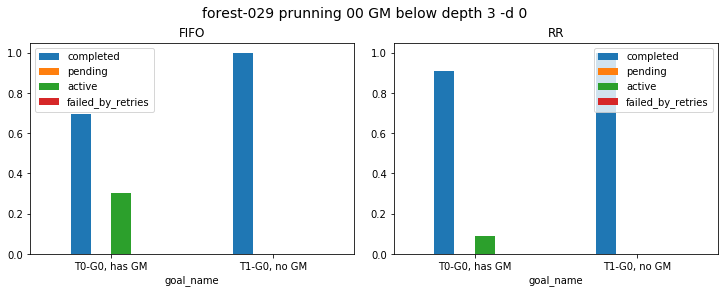

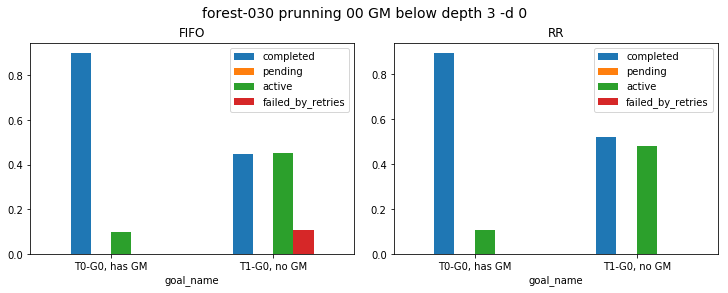

In [194]:
plot_many3(df00above_00_ff, df00above_00_rr, "FIFO", "RR", "above00", "prunning 00 GM below depth 3 -d 0")

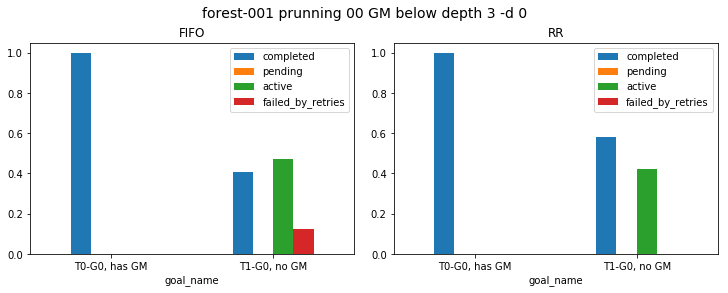

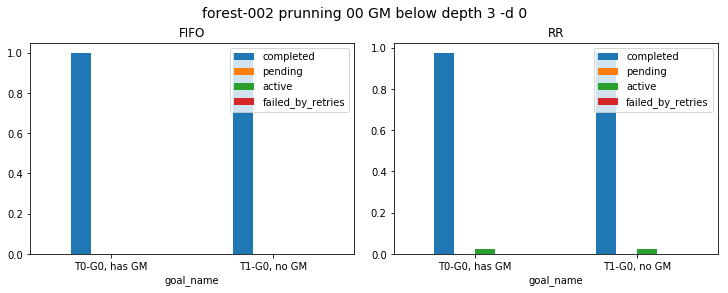

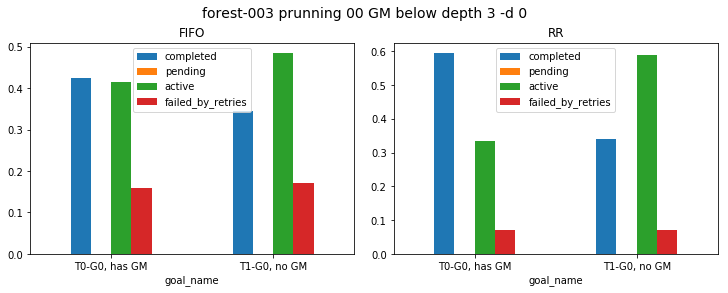

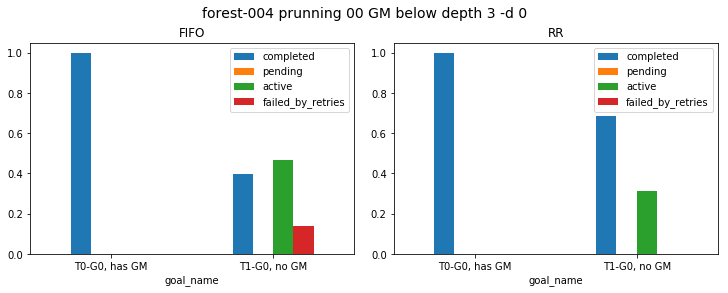

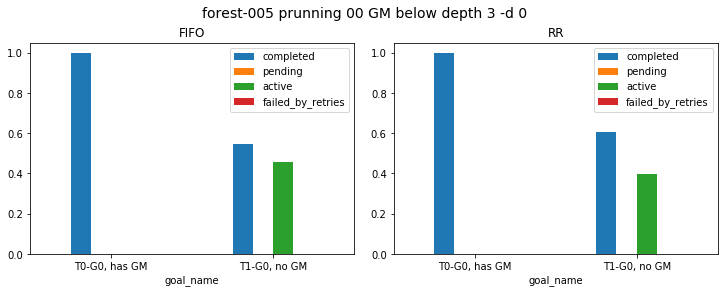

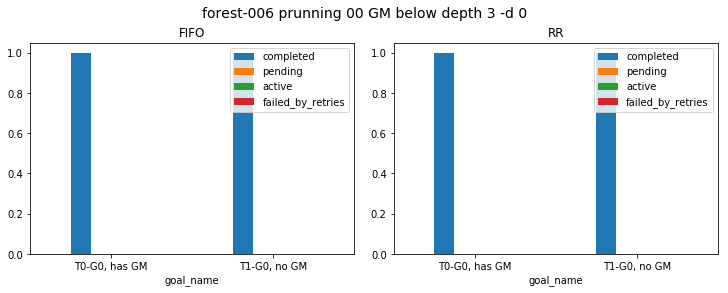

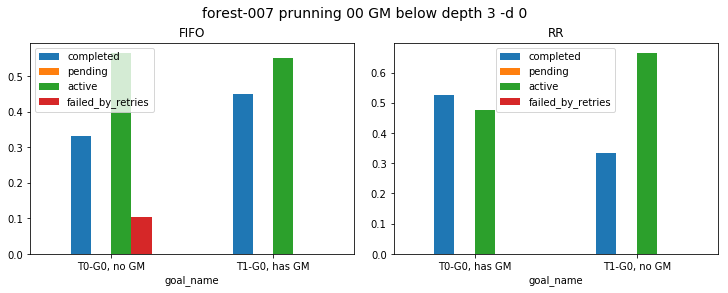

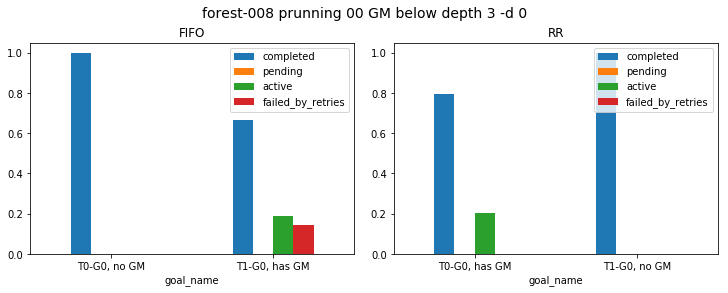

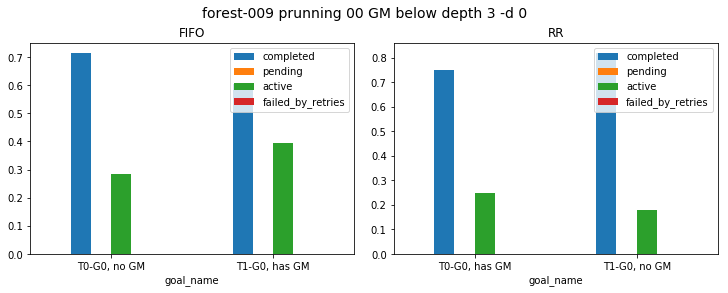

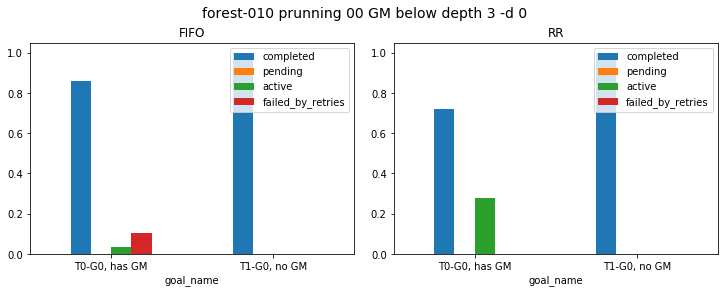

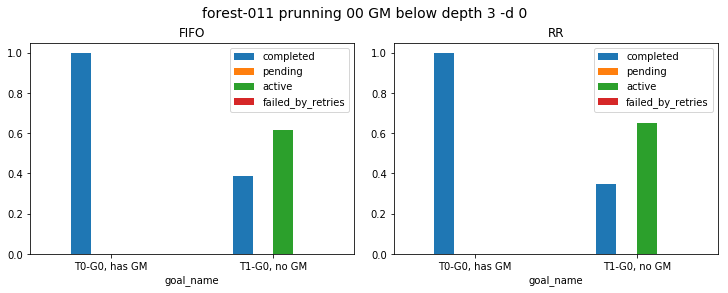

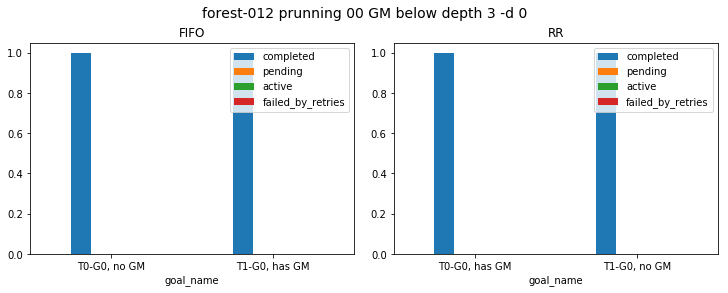

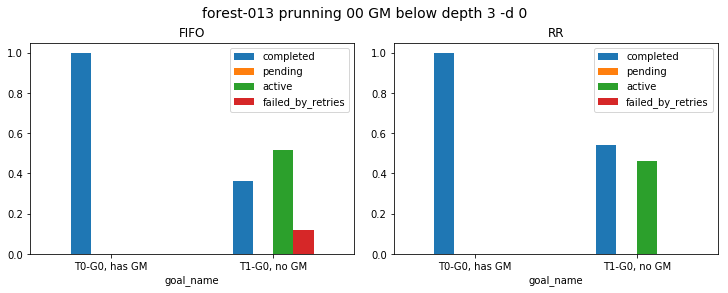

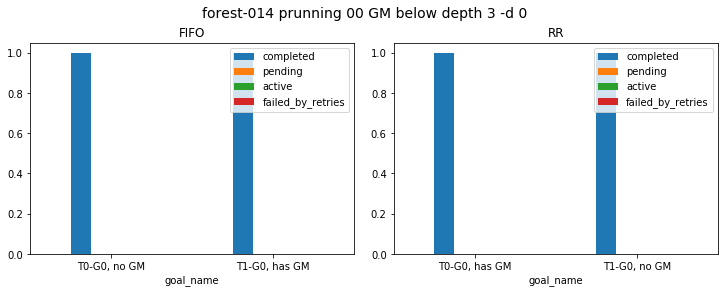

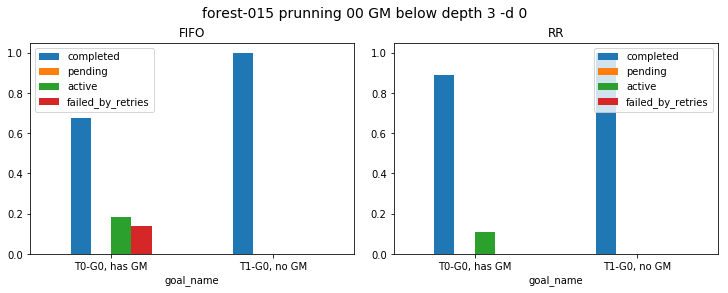

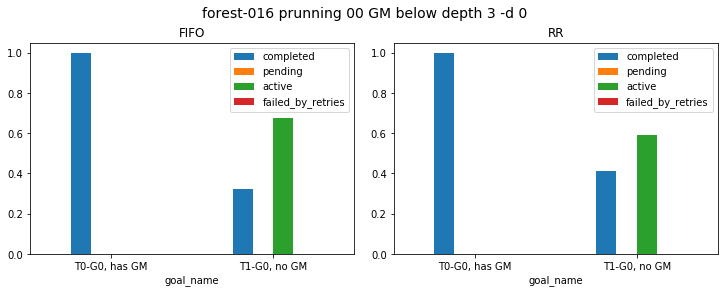

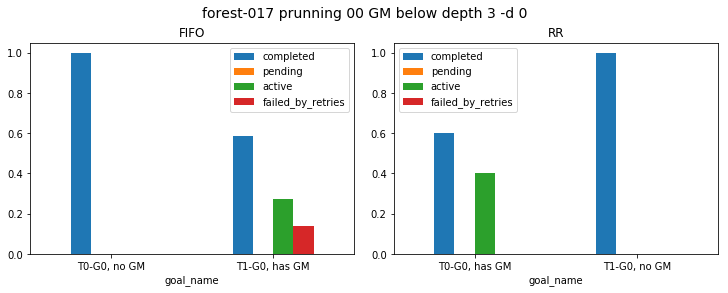

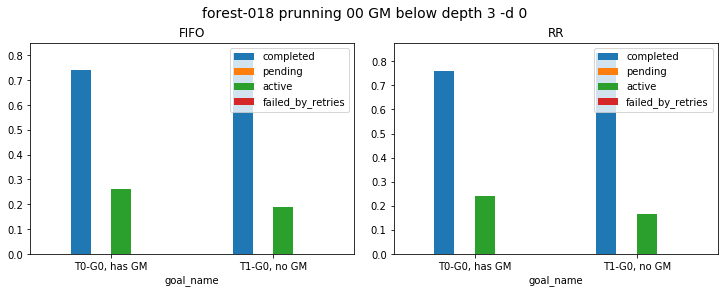

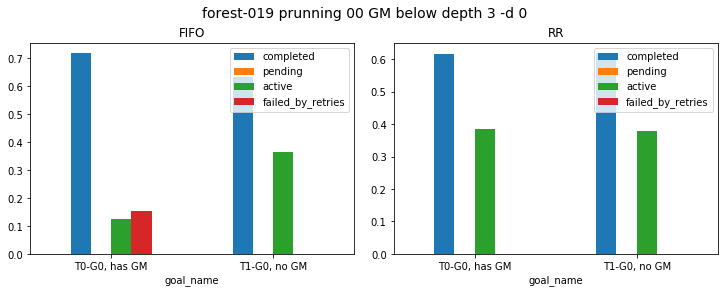

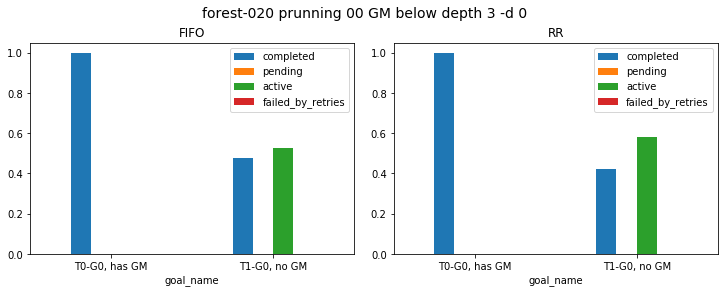

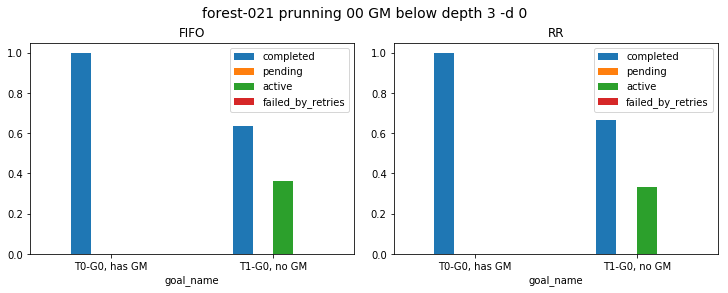

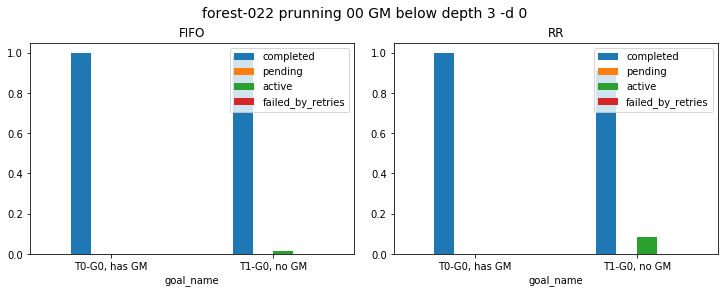

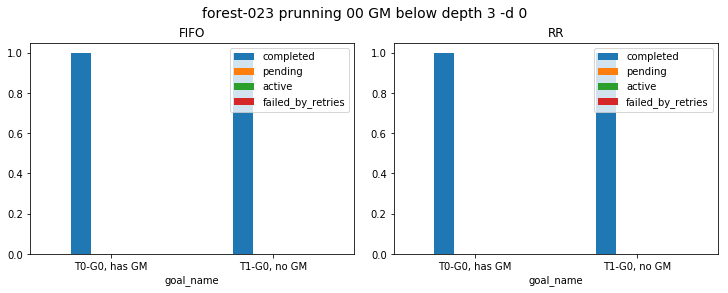

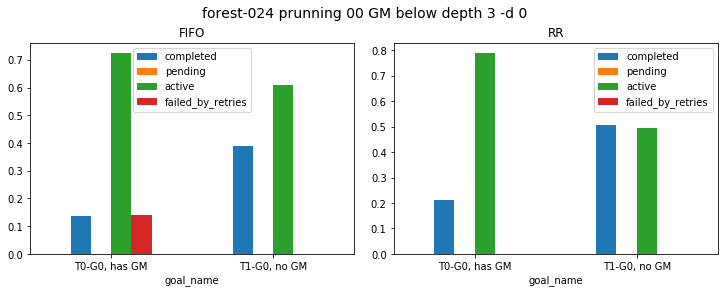

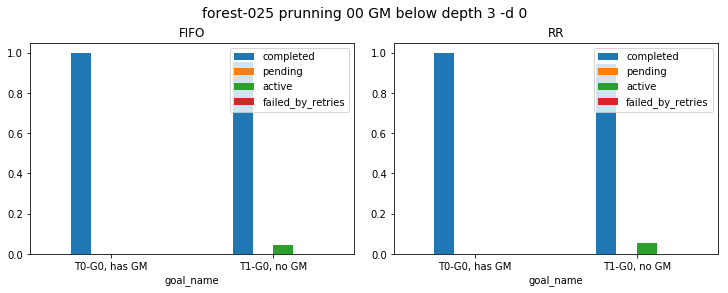

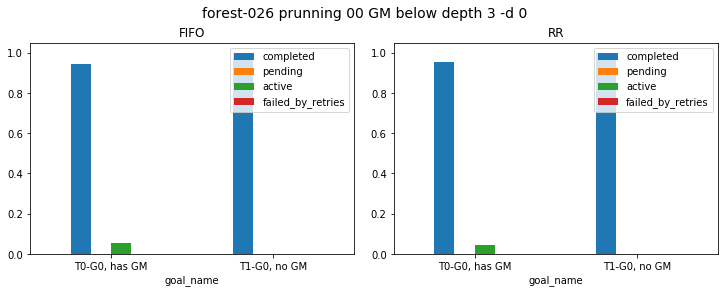

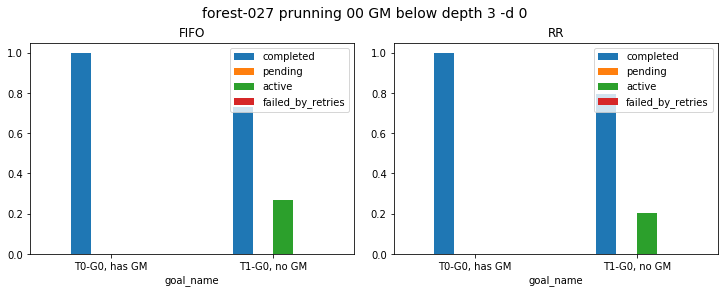

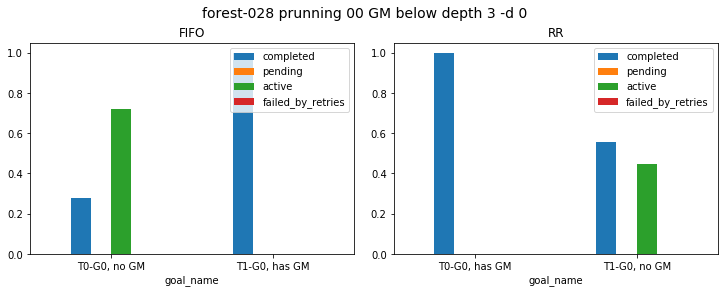

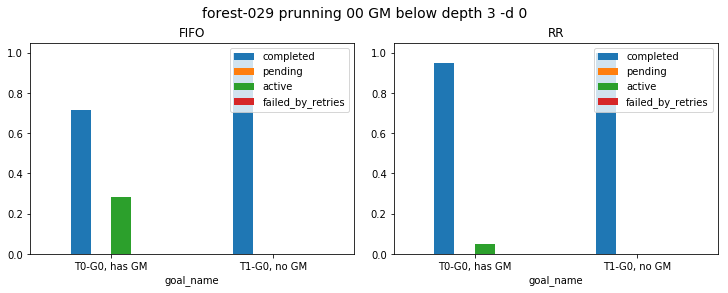

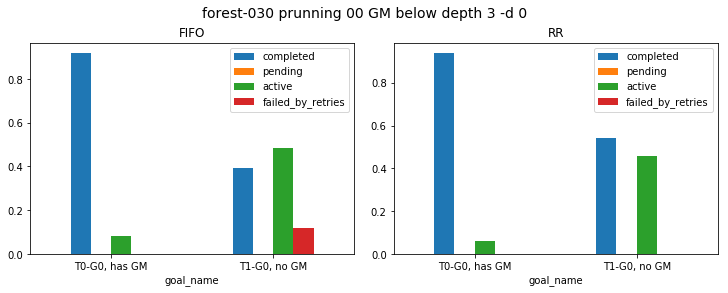

In [195]:
plot_many3(df00bellow_00_ff, df00bellow_00_rr, "FIFO", "RR", "below00", "prunning 00 GM below depth 3 -d 0")

IndexError: list index out of range

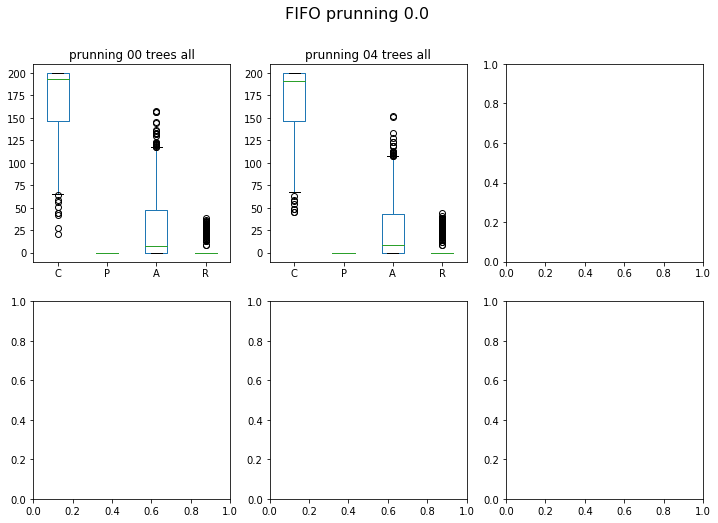

In [26]:
plot_all([df00_all ,df04_all], \
             ['prunning 00 trees all', 'prunning 04 trees all'], "FIFO prunning 0.0")

In [ ]:
df00_all['completed'].mean()

In [ ]:
df04_all['completed'].mean()

In [ ]:
df00_all['active'].mean()

In [ ]:
df04_all['active'].mean()

In [ ]:
df00_all['failed_by_retries'].mean()

In [ ]:
df04_all['failed_by_retries'].mean()

In [ ]:
plot_all([df00_ff ,df04_ff], \
             ['prunning 00 fifo all depth', 'prunning 04 fifo all depth'], "FIFO prunning 0.0")

In [ ]:
plot_all([df00_rr ,df04_rr], \
             ['prunning 00 rr all depth', 'prunning 04 rr all depth'], "FIFO prunning 0.0")